In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True, 요당 제외
# target_cols_direction = [True, True, True, True]
# target_cols_direction = [True, True, True,]
target_cols_direction = ['center', True, 'center',]

In [21]:
target_cols_ratio = [4, 4, 4,]

In [22]:
target_cols_kde = ['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde']

In [23]:
csv_path = './output/대사기능_탄수화물대사.csv'

In [24]:
model_path_man = './model/0801_man.pkl'

In [25]:
model_path_woman = './model/0801_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        
#         '공복시혈당(FBS)', '중성지방(TG)', '요당 (Gluco)', '당화혈색소 (HbA1c)',
        '공복시혈당(FBS)', '중성지방(TG)', '당화혈색소 (HbA1c)', 
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
0,2010,7282,2520,1,42,83,98,None
1,2010,7490,3638,1,39,125,103,None
2,2010,7915,3997,1,36,104,547,None
3,2010,8056,4745,1,42,89,378,None
4,2010,8457,3929,1,38,121,154,None


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   검진년도           1213899 non-null  object
 1   UID            1213899 non-null  int64 
 2   CU_REC_ID      1213899 non-null  int64 
 3   SEX            1213899 non-null  int64 
 4   검진당시나이         1213899 non-null  int64 
 5   공복시혈당(FBS)     1201446 non-null  object
 6   중성지방(TG)       1109130 non-null  object
 7   당화혈색소 (HbA1c)  721462 non-null   object
dtypes: int64(4), object(4)
memory usage: 74.1+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)'],
      dtype='object')

In [34]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

## 요당 (Gluco) 분포 

In [35]:
# df['요당 (Gluco)'].value_counts().head(500)

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [36]:
df.isnull().sum()

검진년도                  0
UID                   0
CU_REC_ID             0
SEX                   0
검진당시나이                0
공복시혈당(FBS)        12453
중성지방(TG)         104769
당화혈색소 (HbA1c)    492437
dtype: int64

In [37]:
df_group = df.groupby(['UID', '검진년도'])

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
temp

['공복시혈당(FBS)', '중성지방(TG)', '당화혈색소 (HbA1c)']

In [40]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 공복시혈당(FBS)
column : 중성지방(TG)
column : 당화혈색소 (HbA1c)
1777.31435 sec


In [41]:
df.isnull().sum()

검진년도                  0
UID                   0
CU_REC_ID             0
SEX                   0
검진당시나이                0
공복시혈당(FBS)        10700
중성지방(TG)          61551
당화혈색소 (HbA1c)    451702
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [42]:
numeric_col = df.columns

In [43]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   공복시혈당(FBS)     1199640 non-null  float64
 6   중성지방(TG)       1147041 non-null  float64
 7   당화혈색소 (HbA1c)  758186 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [45]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.199640e+06,1.147041e+06,758186.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,9.676183e+01,1.224728e+02,5.779435
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.708342e+01,9.417363e+01,8.071067
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,8.800000e+01,6.800000e+01,5.200000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,9.400000e+01,9.800000e+01,5.400000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.010000e+02,1.480000e+02,5.700000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,6.140000e+02,6.110000e+03,467.000000


In [46]:
df_result = df.copy()

# 이상치 제거

In [47]:
len(df_result)

1213899

In [48]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [49]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [50]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 68.5 maximum : 120.5
공복시혈당(FBS) : 1213899 / IQR outliers:  62750 / ratio : 0.05169293326710048

minimum : -52.0 maximum : 268.0
중성지방(TG) : 1213899 / IQR outliers:  63028 / ratio : 0.051921947377829625

minimum : 4.45 maximum : 6.45
당화혈색소 (HbA1c) : 1213899 / IQR outliers:  38583 / ratio : 0.031784357677203785



In [51]:
target_cols

['공복시혈당(FBS)', '중성지방(TG)', '당화혈색소 (HbA1c)']

In [52]:
minimums

[68.5, -52.0, 4.45]

In [53]:
maximums

[120.5, 268.0, 6.45]

In [54]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085941 entries, 0 to 1085940
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1085941 non-null  int64  
 1   UID            1085941 non-null  int64  
 2   CU_REC_ID      1085941 non-null  int64  
 3   SEX            1085941 non-null  int64  
 4   검진당시나이         1085941 non-null  int64  
 5   공복시혈당(FBS)     1072401 non-null  float64
 6   중성지방(TG)       1022089 non-null  float64
 7   당화혈색소 (HbA1c)  666928 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 66.3 MB


In [55]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
0,2010,7282,2520,1,42,83.0,98.0,NaN
1,2010,8634,4751,1,43,96.0,136.0,NaN
2,2010,11158,1703,1,37,86.0,171.0,NaN
3,2010,13020,2211,1,34,101.0,66.0,NaN
4,2010,13999,3816,1,53,112.0,174.0,NaN


In [56]:
len(df_result)

1085941

In [57]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085941 entries, 0 to 1085940
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1085941 non-null  int64  
 1   UID            1085941 non-null  int64  
 2   CU_REC_ID      1085941 non-null  int64  
 3   SEX            1085941 non-null  int64  
 4   검진당시나이         1085941 non-null  int64  
 5   공복시혈당(FBS)     1072401 non-null  float64
 6   중성지방(TG)       1022089 non-null  float64
 7   당화혈색소 (HbA1c)  666928 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 66.3 MB


In [58]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
count,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.072401e+06,1.022089e+06,666928.000000
mean,2.021875e+03,5.086726e+05,1.491313e+06,1.397396e+00,4.023016e+01,9.395112e+01,1.052479e+02,5.412426
std,1.698697e+00,3.651811e+05,7.931600e+05,4.893595e-01,8.851791e+00,9.064309e+00,5.207909e+01,0.319343
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,6.880000e+01,9.000000e-01,4.450000
25%,2.021000e+03,2.211760e+05,6.805300e+05,1.000000e+00,3.300000e+01,8.800000e+01,6.500000e+01,5.200000
50%,2.022000e+03,3.806980e+05,1.411084e+06,1.000000e+00,4.000000e+01,9.300000e+01,9.200000e+01,5.400000
75%,2.023000e+03,8.355760e+05,2.173403e+06,2.000000e+00,4.700000e+01,1.000000e+02,1.340000e+02,5.600000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.204000e+02,2.680000e+02,6.450000


# 스크리닝

## 스크리닝

In [59]:
screening = 50

In [60]:
scr_col = '공복시혈당(FBS)'

In [61]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [62]:
len(df_result[df_result[scr_col] < screening])

0

In [63]:
df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [64]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [65]:
len(df_result[df_result[scr_col] < screening])

0

# 변수 생성

## TyG index

In [66]:
(df_result['공복시혈당(FBS)'] * df_result['중성지방(TG)']) / 2

0          4067.0
1          6528.0
2          7353.0
3          3333.0
4          9744.0
            ...  
1085936    3942.5
1085937    3942.5
1085938    2082.5
1085939    2125.0
1085940    8137.0
Length: 1085941, dtype: float64

In [67]:
np.log((df_result['공복시혈당(FBS)'] * df_result['중성지방(TG)']) / 2)

0          8.310661
1          8.783856
2          8.902864
3          8.111628
4          9.184407
             ...   
1085936    8.279570
1085937    8.279570
1085938    7.641324
1085939    7.661527
1085940    9.004177
Length: 1085941, dtype: float64

In [68]:
df_result['TyG'] = np.log((df_result['공복시혈당(FBS)'] * df_result['중성지방(TG)']) / 2)

In [69]:
df_result['TyG'] = df_result['TyG'].round(2)

In [70]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG
count,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.072401e+06,1.022089e+06,666928.000000,1.018073e+06
mean,2.021875e+03,5.086726e+05,1.491313e+06,1.397396e+00,4.023016e+01,9.395112e+01,1.052479e+02,5.412426,8.383750e+00
std,1.698697e+00,3.651811e+05,7.931600e+05,4.893595e-01,8.851791e+00,9.064309e+00,5.207909e+01,0.319343,5.271756e-01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,6.880000e+01,9.000000e-01,4.450000,3.810000e+00
25%,2.021000e+03,2.211760e+05,6.805300e+05,1.000000e+00,3.300000e+01,8.800000e+01,6.500000e+01,5.200000,8.000000e+00
50%,2.022000e+03,3.806980e+05,1.411084e+06,1.000000e+00,4.000000e+01,9.300000e+01,9.200000e+01,5.400000,8.370000e+00
75%,2.023000e+03,8.355760e+05,2.173403e+06,2.000000e+00,4.700000e+01,1.000000e+02,1.340000e+02,5.600000,8.770000e+00
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.204000e+02,2.680000e+02,6.450000,9.690000e+00


In [71]:
df_result.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG'],
      dtype='object')

In [72]:
target_cols_temp = target_cols.copy()

In [73]:
target_cols = df_result.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '중성지방(TG)']:
    target_cols.remove(idx)

In [74]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

# target (건강지수) 계산

In [75]:
len(df_result)

1085941

## Linear Regression coefficient 계산

In [76]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [77]:
# target_cols

In [78]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [79]:
# df_man[df_man['target'].isna()]

In [80]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [81]:
# df_target = pd.concat([df_man, df_woman])

In [82]:
# len(df_target)

In [83]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [84]:
# len(df_target)

In [85]:
# df_target[df_target['target'].isna()]

In [86]:
# df_target.info()

In [87]:
# df_target.head()

In [88]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [89]:
# len(df_target)

In [90]:
# df_target.describe()

In [91]:
# df_target[df_target['target'] == 50]

In [92]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [93]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [94]:
# len(df_target)

In [95]:
# df_target.head()

In [96]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

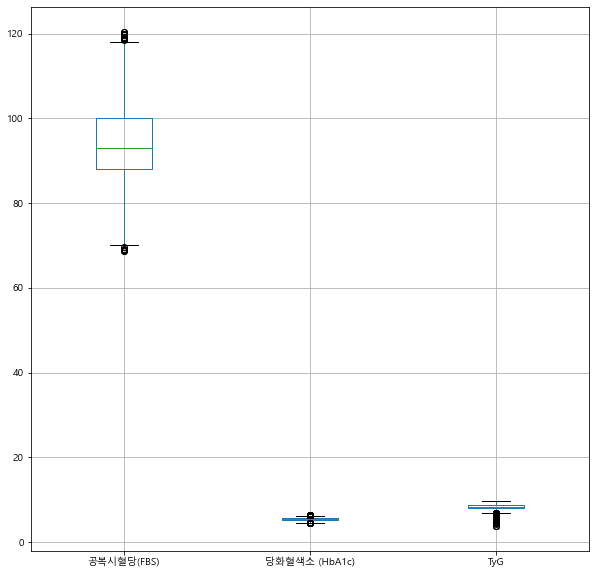

In [97]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [98]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG
0,2010,7282,2520,1,42,83.0,98.0,NaN,8.31
1,2010,8634,4751,1,43,96.0,136.0,NaN,8.78
2,2010,11158,1703,1,37,86.0,171.0,NaN,8.90
3,2010,13020,2211,1,34,101.0,66.0,NaN,8.11
4,2010,13999,3816,1,53,112.0,174.0,NaN,9.18


In [99]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [100]:
len(target_cols)

3

In [101]:
target_cols_direction

['center', True, 'center']

In [102]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    # 파생요소 때문에 1을 추가
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols) + 1):(5+len(cols) + 1 + len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [103]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

586.63214 sec


## 검진 항목 별 가중치 

In [104]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40


In [105]:
target_cols_kde

['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde']

In [106]:
target_cols_ratio

[4, 4, 4]

In [107]:
sum(target_cols_ratio)

12

In [108]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085941 entries, 289595 to 165551
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1085941 non-null  int64  
 1   UID                1085941 non-null  int64  
 2   CU_REC_ID          1085941 non-null  int64  
 3   SEX                1085941 non-null  int64  
 4   검진당시나이             1085941 non-null  int64  
 5   공복시혈당(FBS)         1072401 non-null  float64
 6   중성지방(TG)           1022089 non-null  float64
 7   당화혈색소 (HbA1c)      666928 non-null   float64
 8   TyG                1018073 non-null  float64
 9   공복시혈당(FBS)_kde     1085941 non-null  float64
 10  당화혈색소 (HbA1c)_kde  1085941 non-null  float64
 11  TyG_kde            1085941 non-null  float64
 12  kde_mean           1085941 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 116.0 MB


In [109]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])      
) / sum(target_cols_ratio)

In [110]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [111]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [112]:
df_target['kde_mean'].min()

0.64

In [113]:
df_target['kde_mean'].max()

166.5

In [114]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean
15,2019,152079,325977,1,20,83.0,144.0,4.80,8.70,61.98,178.98,38.22,93.06
36,2019,392728,325980,1,20,85.0,60.0,5.60,7.84,97.27,22.36,131.26,83.63
38,2019,438481,325982,1,20,90.0,63.0,5.30,7.95,147.78,100.00,150.00,132.59
39,2019,439691,326889,1,20,97.0,61.0,NaN,7.99,118.03,100.00,148.28,122.10
16,2019,153352,327360,1,20,88.0,53.0,NaN,7.75,133.39,100.00,96.94,110.11
11,2019,130234,328771,1,20,88.0,82.0,5.30,8.19,133.39,100.00,147.23,126.87
29,2019,339160,328877,1,20,94.0,111.0,5.30,8.56,126.58,100.00,76.66,101.08
8,2019,41096,329045,1,20,98.9,77.9,5.36,8.26,87.49,86.41,142.20,105.37
9,2019,117629,330495,1,20,76.0,71.0,NaN,7.90,20.22,100.00,146.29,88.84
27,2019,331204,330752,1,20,100.0,92.0,5.50,8.43,68.45,54.01,121.51,81.32


In [115]:
df_target['검진당시나이'].value_counts()

40    48747
38    48014
36    46137
42    43794
34    41416
39    41236
32    41106
37    40896
30    40756
41    40444
35    38723
44    36774
43    34995
31    34442
33    33982
46    33319
28    32431
48    32254
50    31490
45    29967
29    29943
47    28847
49    28426
51    27567
52    26738
27    22289
53    21838
54    19695
26    18998
55    14047
56    12405
57    10367
25    10218
58     9234
59     7190
24     6839
60     5145
23     3252
22     2493
61     1492
62     1449
21     1259
20     1091
63     1013
64     1013
65      643
66      592
67      393
68      363
69      179
Name: 검진당시나이, dtype: int64

In [116]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean
count,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.072401e+06,1.022089e+06,666928.000000,1.018073e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06
mean,2.021875e+03,5.086726e+05,1.491313e+06,1.397396e+00,4.023016e+01,9.395112e+01,1.052479e+02,5.412426,8.383750e+00,1.033565e+02,9.914209e+01,1.078876e+02,1.034621e+02
std,1.698697e+00,3.651811e+05,7.931600e+05,4.893595e-01,8.851791e+00,9.064309e+00,5.207909e+01,0.319343,5.271756e-01,4.207916e+01,3.260030e+01,3.801753e+01,2.348469e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,6.880000e+01,9.000000e-01,4.450000,3.810000e+00,1.100000e-01,0.000000e+00,0.000000e+00,6.400000e-01
25%,2.021000e+03,2.211760e+05,6.805300e+05,1.000000e+00,3.300000e+01,8.800000e+01,6.500000e+01,5.200000,8.000000e+00,7.281000e+01,9.627000e+01,8.649000e+01,8.920000e+01
50%,2.022000e+03,3.806980e+05,1.411084e+06,1.000000e+00,4.000000e+01,9.300000e+01,9.200000e+01,5.400000,8.370000e+00,1.147700e+02,1.000000e+02,1.171400e+02,1.063000e+02
75%,2.023000e+03,8.355760e+05,2.173403e+06,2.000000e+00,4.700000e+01,1.000000e+02,1.340000e+02,5.600000,8.770000e+00,1.411700e+02,1.018700e+02,1.407000e+02,1.207500e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.204000e+02,2.680000e+02,6.450000,9.690000e+00,1.503700e+02,1.998700e+02,1.500000e+02,1.665000e+02


<AxesSubplot:>

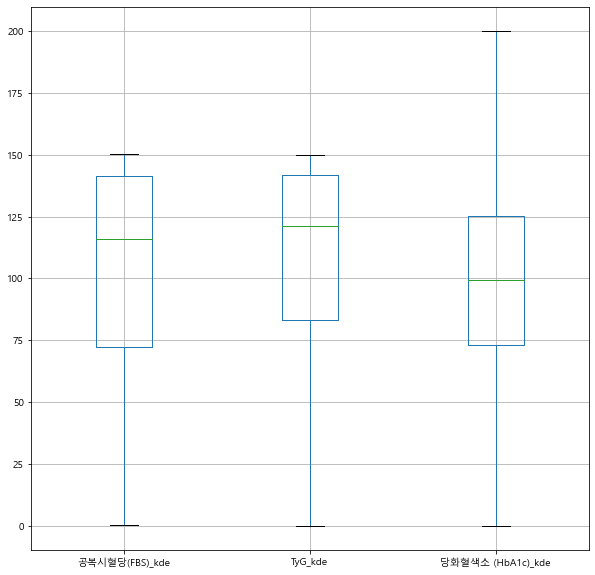

In [117]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
# df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', '중성지방(TG)_kde', '요당 (Gluco)_kde', '당화혈색소 (HbA1c)_kde'])
# df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', '중성지방(TG)_kde', '당화혈색소 (HbA1c)_kde'])
df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde'])

<AxesSubplot:>

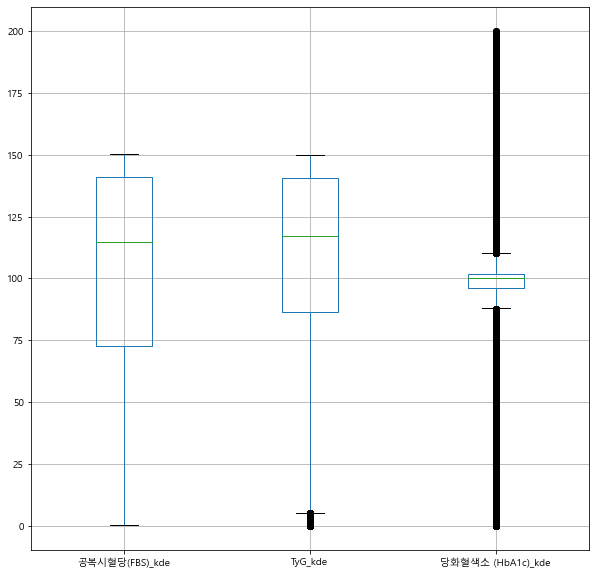

In [118]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
# df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', '중성지방(TG)_kde', '요당 (Gluco)_kde', '당화혈색소 (HbA1c)_kde'])
# df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', '중성지방(TG)_kde', '당화혈색소 (HbA1c)_kde'])
df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde'])

## target Scaling

In [119]:
df_target['kde_mean'].max()

166.5

In [120]:
df_target['kde_mean'].min()

0.64

In [121]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [122]:
df_target['target'] = (df_target['target'] * 100) + 50

In [123]:
df_target['target'] = df_target['target'].round(0)

In [124]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
83,50.0,3
82,51.0,22
81,52.0,34
79,53.0,69
78,54.0,109
77,55.0,152
76,56.0,179
75,57.0,238
73,58.0,301
72,59.0,311


In [125]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
count,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.072401e+06,1.022089e+06,666928.000000,1.018073e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06,1.085941e+06
mean,2.021875e+03,5.086726e+05,1.491313e+06,1.397396e+00,4.023016e+01,9.395112e+01,1.052479e+02,5.412426,8.383750e+00,1.033565e+02,9.914209e+01,1.078876e+02,1.034621e+02,1.017314e+02
std,1.698697e+00,3.651811e+05,7.931600e+05,4.893595e-01,8.851791e+00,9.064309e+00,5.207909e+01,0.319343,5.271756e-01,4.207916e+01,3.260030e+01,3.801753e+01,2.348469e+01,1.174497e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,6.880000e+01,9.000000e-01,4.450000,3.810000e+00,1.100000e-01,0.000000e+00,0.000000e+00,6.400000e-01,5.000000e+01
25%,2.021000e+03,2.211760e+05,6.805300e+05,1.000000e+00,3.300000e+01,8.800000e+01,6.500000e+01,5.200000,8.000000e+00,7.281000e+01,9.627000e+01,8.649000e+01,8.920000e+01,9.500000e+01
50%,2.022000e+03,3.806980e+05,1.411084e+06,1.000000e+00,4.000000e+01,9.300000e+01,9.200000e+01,5.400000,8.370000e+00,1.147700e+02,1.000000e+02,1.171400e+02,1.063000e+02,1.030000e+02
75%,2.023000e+03,8.355760e+05,2.173403e+06,2.000000e+00,4.700000e+01,1.000000e+02,1.340000e+02,5.600000,8.770000e+00,1.411700e+02,1.018700e+02,1.407000e+02,1.207500e+02,1.100000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.204000e+02,2.680000e+02,6.450000,9.690000e+00,1.503700e+02,1.998700e+02,1.500000e+02,1.665000e+02,1.330000e+02


<AxesSubplot:>

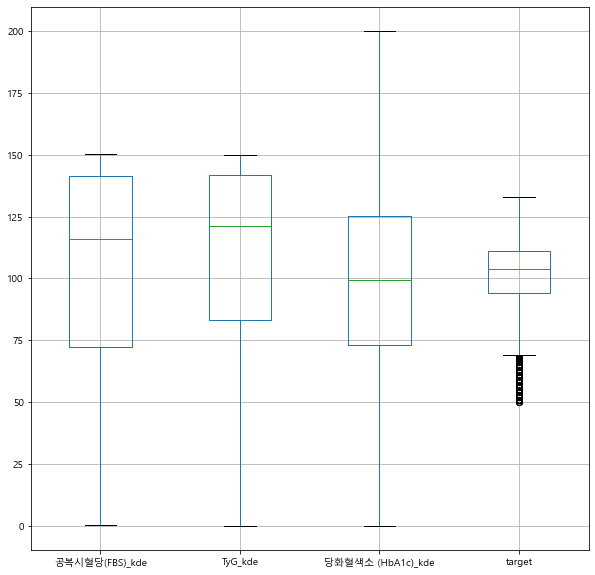

In [126]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde', 'target'])

<AxesSubplot:>

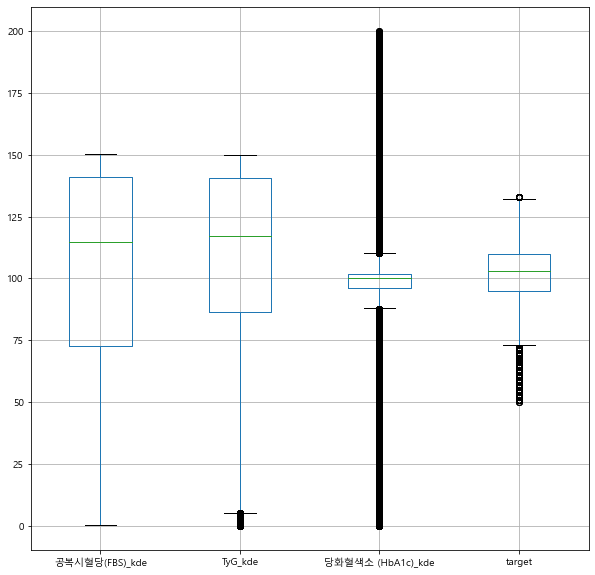

In [127]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['공복시혈당(FBS)_kde', 'TyG_kde', '당화혈색소 (HbA1c)_kde', 'target'])

<AxesSubplot:>

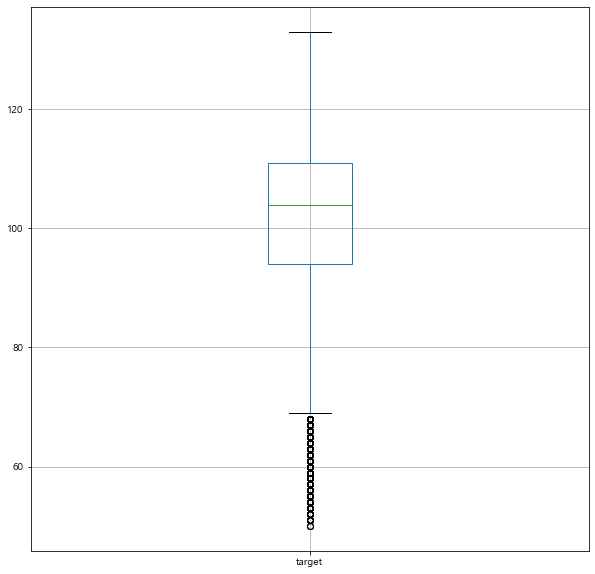

In [128]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

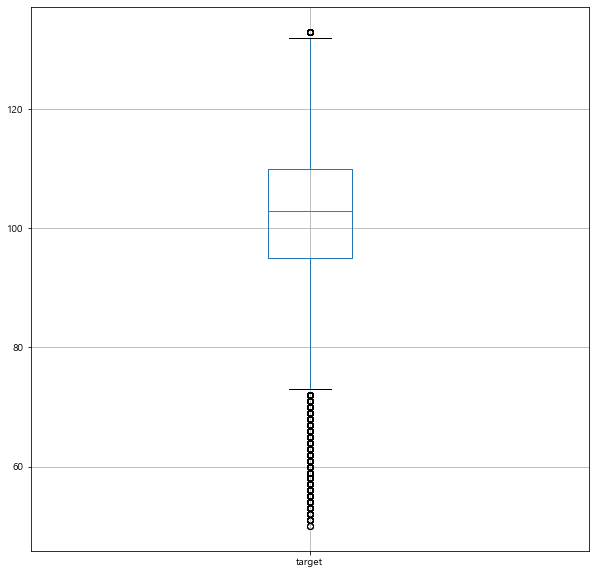

In [129]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

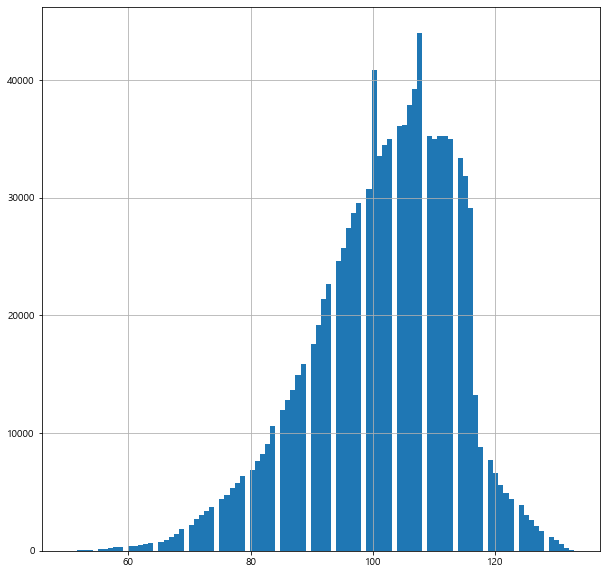

In [130]:
df_boxplot['target'].hist(bins=100)

In [131]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53,102.0
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63,112.0
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38,101.0
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24,104.0
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40,101.0
696098,2010,710490,213,2,28,84.0,42.0,NaN,7.48,105.34,100.00,87.58,97.64,99.0
413372,2010,491012,226,1,45,107.0,167.0,NaN,9.10,71.24,100.00,108.16,93.13,97.0
657810,2010,315847,230,2,23,84.0,38.0,NaN,7.38,105.43,100.00,55.02,86.82,93.0
660156,2010,719072,231,2,24,95.0,43.0,NaN,7.62,93.67,100.00,122.70,105.46,103.0
237927,2010,614169,238,1,38,81.0,147.0,NaN,8.69,32.76,100.00,145.67,92.81,96.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

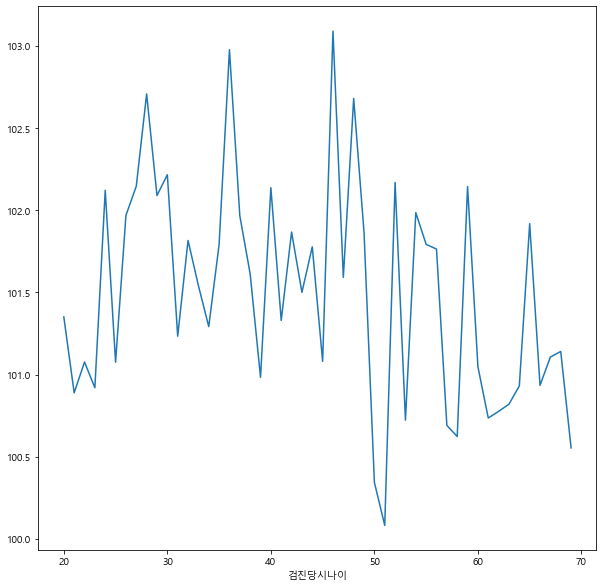

In [132]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

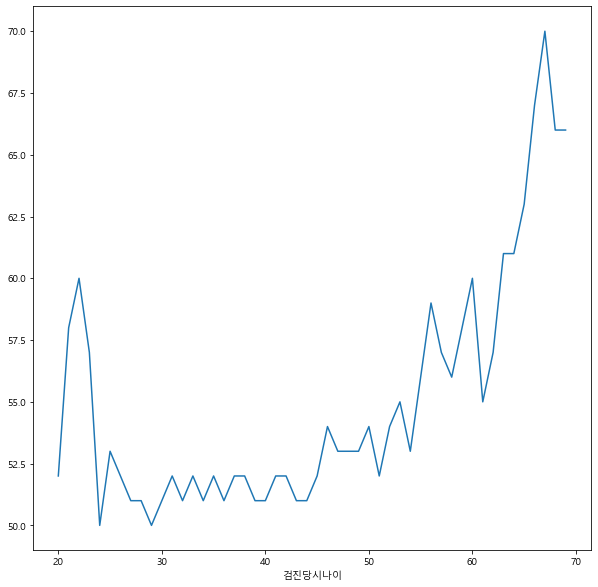

In [133]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

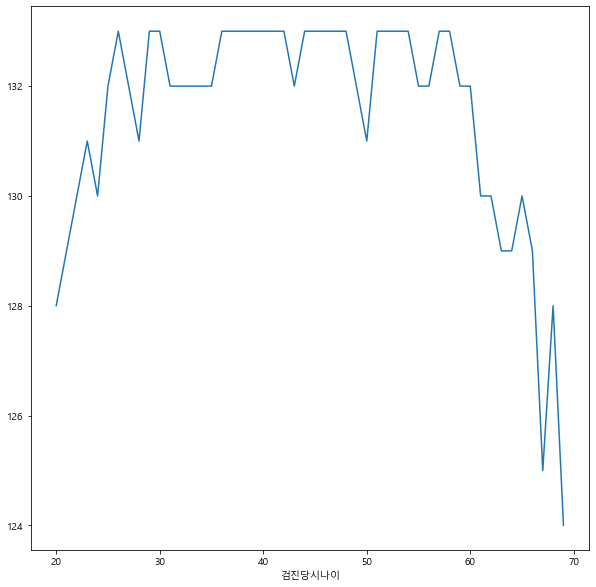

In [134]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [135]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53,102.0
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63,112.0
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38,101.0
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24,104.0
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40,101.0


# 결측행 제거

In [136]:
# df_result.dropna(axis=0).info()

In [137]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [138]:
df_target['SEX'].value_counts()

1    654392
2    431549
Name: SEX, dtype: int64

In [139]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

654392

In [140]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53,102.0
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63,112.0
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38,101.0
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24,104.0
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40,101.0


# 결측치 처리

## 결측치 삭제

In [141]:
# df_man.dropna(inplace=True)

In [142]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53,102.0
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63,112.0
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38,101.0
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24,104.0
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40,101.0


## 결측치 평균으로 대체

In [143]:
# 결측치를 평균으로 대체 하는 함수
# fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [144]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [145]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [146]:
len(df_man)

654392

In [147]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [148]:
len(df_man)

649422

In [149]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
289595,2010,609272,143,1,40,88.0,129.0,5.7,8.64,103.37,60.54,149.68,104.53,102.0
552170,2010,585711,154,1,52,92.0,146.0,NaN,8.81,127.98,100.00,145.92,124.63,112.0
471492,2010,593983,156,1,48,86.0,105.0,NaN,8.42,77.76,100.00,129.38,102.38,101.0
265573,2010,612330,185,1,39,95.0,62.0,NaN,7.99,148.76,100.00,72.97,107.24,104.0
24759,2010,645901,212,1,28,88.0,51.0,NaN,7.72,126.98,100.00,80.21,102.40,101.0


## fillna

In [150]:
df_man.mean().round(2)

검진년도                    2021.91
UID                   516480.25
CU_REC_ID            1500663.87
SEX                        1.00
검진당시나이                    41.46
공복시혈당(FBS)                96.00
중성지방(TG)                 120.66
당화혈색소 (HbA1c)              5.46
TyG                        8.56
공복시혈당(FBS)_kde           103.83
당화혈색소 (HbA1c)_kde         98.81
TyG_kde                  110.23
kde_mean                 104.29
target                   102.15
dtype: float64

In [151]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [152]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [153]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [154]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [155]:
len(df_man)

649422

In [156]:
len(df_man)

649422

In [157]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [158]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
2336,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0
571560,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0
604701,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0
290106,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0
320489,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0
347988,2021,62,699357,1,42,92.0,144.0,5.00,8.80,141.39,171.68,143.24,152.10,126.0
375724,2022,62,1356310,1,43,79.0,91.0,5.46,8.19,17.98,100.00,101.00,72.99,86.0
403183,2023,62,2170394,1,44,89.0,108.0,5.46,8.48,99.74,100.00,133.55,111.10,106.0
532921,2019,67,410099,1,51,106.0,100.0,5.80,8.58,89.43,54.84,150.00,98.09,99.0
553995,2020,67,481109,1,52,113.0,147.0,6.00,9.02,42.70,33.77,119.33,65.27,83.0


In [159]:
len(df_man)

649422

In [160]:
df_man[target_cols]

,공복시혈당(FBS),당화혈색소 (HbA1c),TyG
2336,84.0,5.46,8.04
571560,85.0,6.00,8.90
604701,105.0,5.80,9.34
290106,90.0,4.90,8.26
320489,89.0,5.10,8.92
...,...,...,...
51614,90.0,5.50,8.63
282057,95.0,5.46,9.15
11965,88.0,5.50,8.19
581808,92.0,5.50,8.19


## first만 남겨두고 중복 제거

In [161]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [162]:
len(df_man)

549040

In [163]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
2336,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0
571560,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0
604701,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0
290106,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0
320489,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0
347988,2021,62,699357,1,42,92.0,144.0,5.00,8.80,141.39,171.68,143.24,152.10,126.0
375724,2022,62,1356310,1,43,79.0,91.0,5.46,8.19,17.98,100.00,101.00,72.99,86.0
403183,2023,62,2170394,1,44,89.0,108.0,5.46,8.48,99.74,100.00,133.55,111.10,106.0
532921,2019,67,410099,1,51,106.0,100.0,5.80,8.58,89.43,54.84,150.00,98.09,99.0
553995,2020,67,481109,1,52,113.0,147.0,6.00,9.02,42.70,33.77,119.33,65.27,83.0


In [164]:
df_man.reset_index(drop=True, inplace=True)

In [165]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
0,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0
1,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0
2,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0
3,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0
4,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0


In [166]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549040 entries, 0 to 549039
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               549040 non-null  int64  
 1   UID                549040 non-null  int64  
 2   CU_REC_ID          549040 non-null  int64  
 3   SEX                549040 non-null  int64  
 4   검진당시나이             549040 non-null  int64  
 5   공복시혈당(FBS)         549040 non-null  float64
 6   중성지방(TG)           549040 non-null  float64
 7   당화혈색소 (HbA1c)      549040 non-null  float64
 8   TyG                549040 non-null  float64
 9   공복시혈당(FBS)_kde     549040 non-null  float64
 10  당화혈색소 (HbA1c)_kde  549040 non-null  float64
 11  TyG_kde            549040 non-null  float64
 12  kde_mean           549040 non-null  float64
 13  target             549040 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 58.6 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

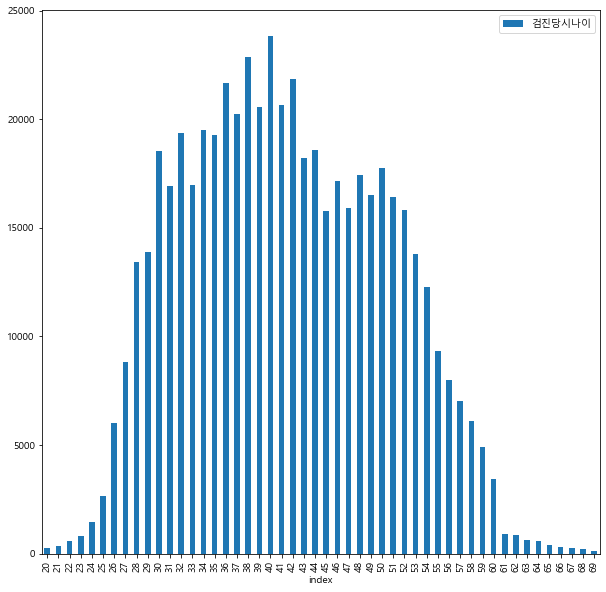

In [167]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [168]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
46,20,234
44,21,330
41,22,588
39,23,793
36,24,1456
35,25,2660
32,26,6012
28,27,8811
25,28,13429
23,29,13880


# 검진항목 시각화

In [169]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
count,549040.000000,5.490400e+05,5.490400e+05,549040.0,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000,549040.000000
mean,2021.852483,5.121973e+05,1.496787e+06,1.0,41.423854,96.048751,120.713570,5.455588,8.558284,103.663892,99.110483,110.118740,104.297714,102.148894
std,1.763517,3.652696e+05,8.086861e+05,0.0,8.863154,8.962347,52.412542,0.254051,0.481198,42.008149,33.124830,36.280548,23.080631,11.543333
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,68.800000,0.900000,4.450000,3.840000,0.240000,0.000000,0.000000,2.930000,51.000000
25%,2021.000000,2.230022e+05,6.629968e+05,1.0,34.000000,90.000000,80.000000,5.400000,8.240000,72.620000,95.230000,90.700000,90.120000,95.000000
50%,2022.000000,3.828500e+05,1.426844e+06,1.0,41.000000,96.000000,115.000000,5.460000,8.560000,116.390000,100.000000,119.630000,107.180000,104.000000
75%,2023.000000,8.397052e+05,2.195452e+06,1.0,48.000000,102.000000,151.000000,5.500000,8.910000,141.390000,102.650000,141.020000,121.330000,111.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,120.400000,268.000000,6.450000,9.690000,150.370000,199.760000,150.000000,166.500000,133.000000


<AxesSubplot:xlabel='검진당시나이'>

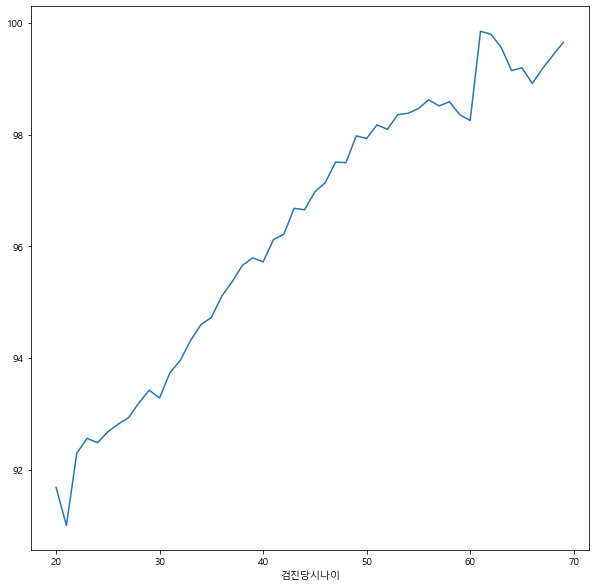

In [170]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

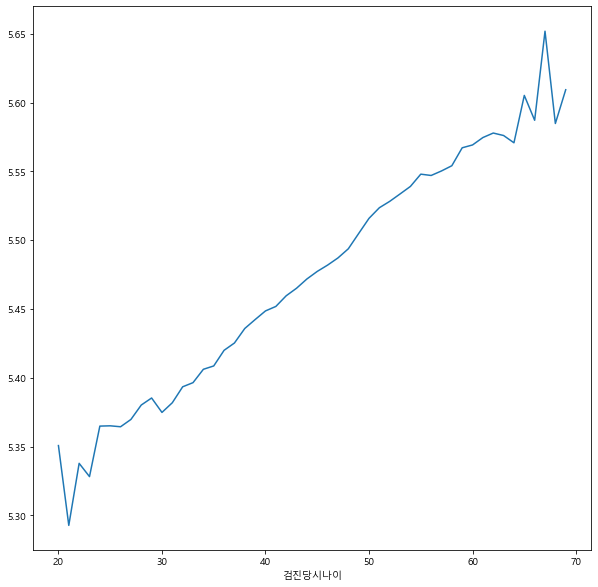

In [171]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [172]:
# df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

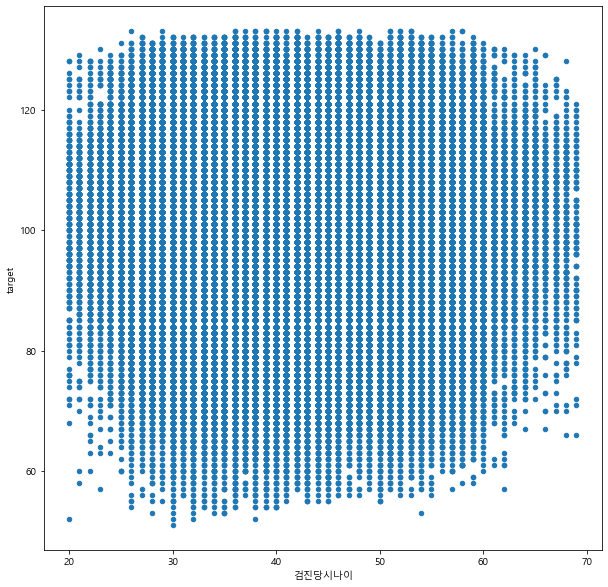

In [173]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

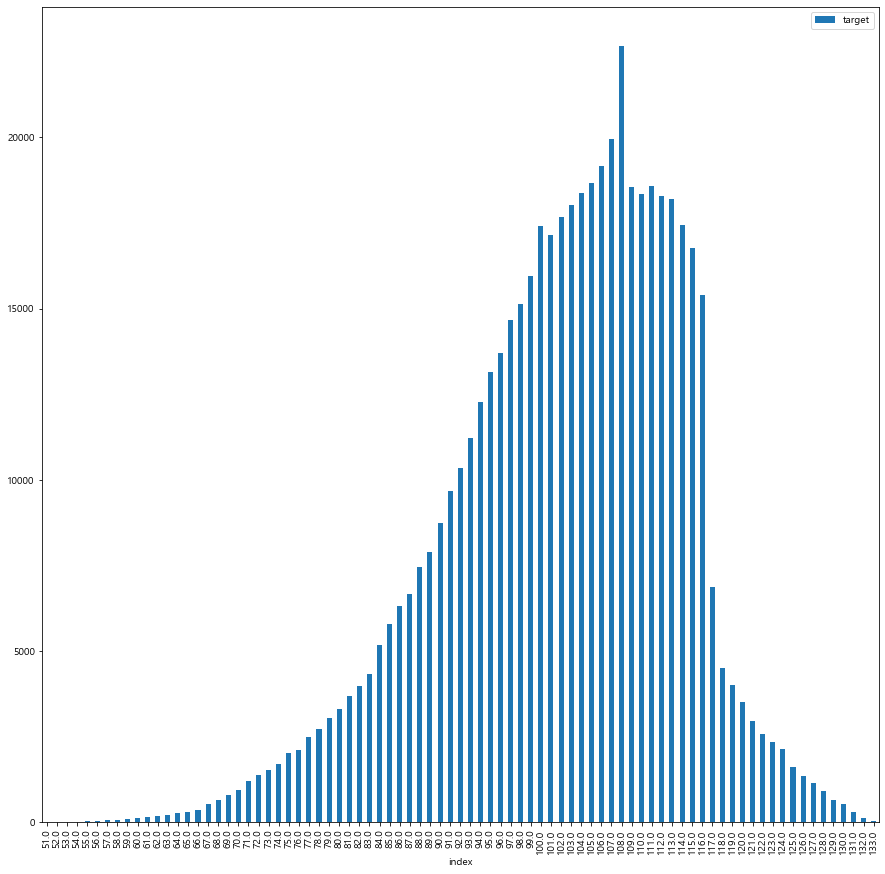

In [174]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [175]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
82,51.0,1
81,52.0,4
80,53.0,8
79,54.0,20
77,55.0,35
76,56.0,42
75,57.0,69
74,58.0,80
73,59.0,96
72,60.0,134


In [176]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [177]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

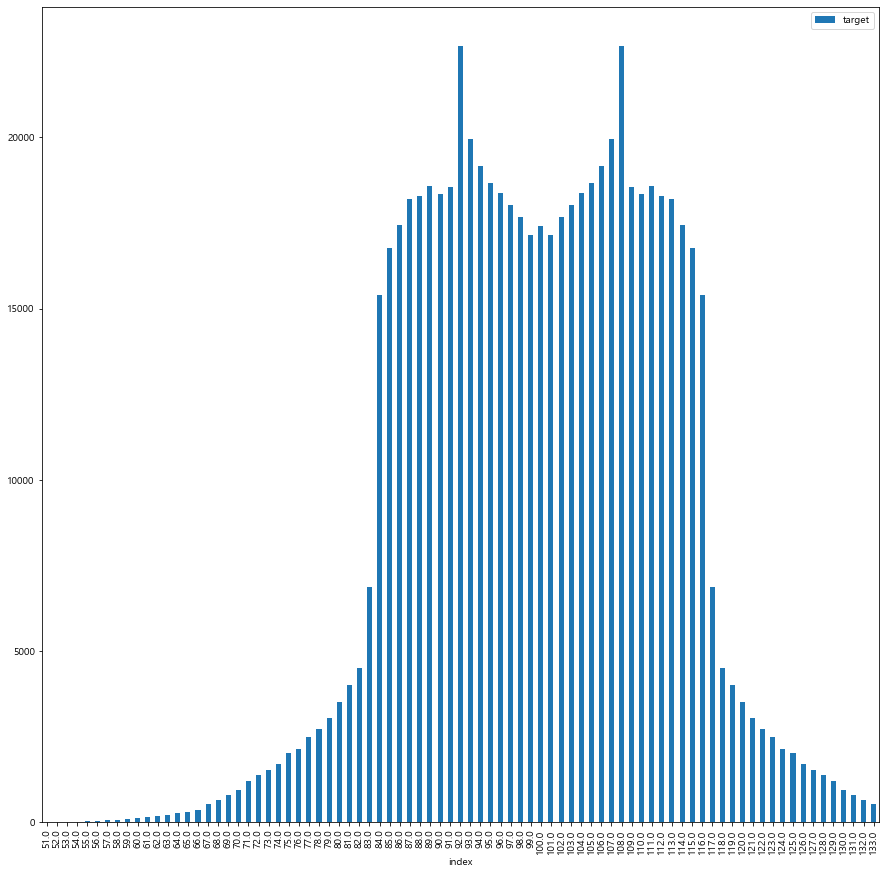

In [178]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [179]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
82,51.0,1
81,52.0,4
80,53.0,8
79,54.0,20
78,55.0,35
77,56.0,42
76,57.0,69
75,58.0,80
74,59.0,96
73,60.0,134


# 나이별 확인하기

In [180]:
# target = 'target'

In [181]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [182]:
# df_man = df_man_sample

In [183]:
# int(df_man['검진당시나이'].value_counts().mean())

In [184]:
# df_man['검진당시나이'].min()

In [185]:
# df_man['검진당시나이'].max()

In [186]:
# df_man.columns

In [187]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [188]:
# df_temp.info()

In [189]:
# df_temp.reset_index(drop=True, inplace=True)

In [190]:
# df_man = df_temp.copy()

In [191]:
# df_man['검진당시나이'].value_counts()

In [192]:
# df_man[df_man['검진당시나이']==38]

In [193]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [194]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG', '공복시혈당(FBS)_kde', '당화혈색소 (HbA1c)_kde',
       'TyG_kde', 'kde_mean', 'target'],
      dtype='object')

In [195]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [196]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [197]:
train_columns = target_cols.copy()

In [198]:
train_columns.insert(0, '검진당시나이')

In [199]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [200]:
train_columns

['검진당시나이', '공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [201]:
target_col = 'target'

## Min Max Scaling

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaling_bool

False

In [204]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [205]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [206]:
# model = LinearRegression()

In [207]:
# model.fit(X_train, y_train)

In [208]:
# model.intercept_

In [209]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [210]:
model = XGBRegressor()

In [211]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [212]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [213]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2701.06 seconds for 10 candidates parameter settings.


In [214]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [215]:
# best score
random_search.best_score_

-0.4961315770178052

In [216]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [217]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [218]:
# model = build_model()

In [219]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [220]:
# model.summary()

In [221]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [222]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [223]:
# plot_history(history)

## pyTorch 신경망

In [224]:
np.shape(X_train)[1]

4

In [225]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [226]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [227]:
# epochs = 1000

In [228]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [229]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [230]:
# plt.plot(losses)

## coef 계산

In [231]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [232]:
# df_coef.columns = ['검사항목', 'coef']

In [233]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [234]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [235]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [236]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [237]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [238]:
# slr = LinearRegression()

In [239]:
# slr.fit(X_train_poly, y_train)

In [240]:
# np.shape(X_train)

In [241]:
# np.shape(X_train_poly)

In [242]:
# np.shape(X_test)

In [243]:
# np.shape(X_test_poly)

In [244]:
# y_pred_poly = slr.predict(X_test_poly)

In [245]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [246]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [247]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [248]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [249]:
pyTorch_bool

False

In [250]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [251]:
XGB_bool

True

In [252]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [253]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.4583238945602794
MSE : 0.49995355972539285
RMSE : 0.7070739421909089


In [254]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9964280353987427

In [255]:
model.score(X_test, y_test)

0.9964280353987427

## feature importance

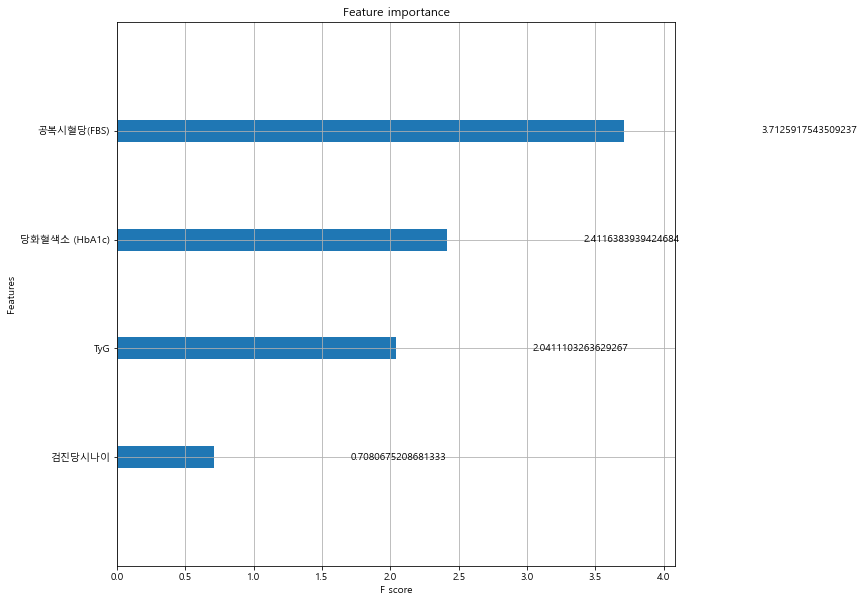

In [256]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [257]:
model.feature_importances_

array([0.07979658, 0.41839528, 0.2717827 , 0.23002553], dtype=float32)

In [258]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [259]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,공복시혈당(FBS),0.418395
2,당화혈색소 (HbA1c),0.271783
3,TyG,0.230026
0,검진당시나이,0.079797


# 실제지수 - 예측지수 결과

In [260]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,115.0
1,85.0
2,115.0
3,105.0
4,96.0
...,...
171553,105.0
171554,106.0
171555,108.0
171556,84.0


In [261]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,115.429512
1,85.584068
2,114.290375
3,104.687332
4,95.664268
...,...
171553,105.386925
171554,106.626289
171555,108.057442
171556,84.629829


In [262]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [263]:
df_test.head()

,target,0
0,115.0,115.429512
1,85.0,85.584068
2,115.0,114.290375
3,105.0,104.687332
4,96.0,95.664268


In [264]:
df_test.columns

Index(['target', 0], dtype='object')

In [265]:
df_test.columns = ['실제지수', '예측지수']

In [266]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [267]:
df_test.head()

,실제지수,예측지수,diff
0,115.0,115.429512,0.429512
1,85.0,85.584068,0.584068
2,115.0,114.290375,-0.709625
3,105.0,104.687332,-0.312668
4,96.0,95.664268,-0.335732


In [268]:
df_test['diff_int'] = df_test['diff'].round(0)

In [269]:
len(df_test)

171558

In [270]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,115.0,115.429512,0.429512,0.0
1,85.0,85.584068,0.584068,1.0
2,115.0,114.290375,-0.709625,-1.0
3,105.0,104.687332,-0.312668,-0.0
4,96.0,95.664268,-0.335732,-0.0


<AxesSubplot:>

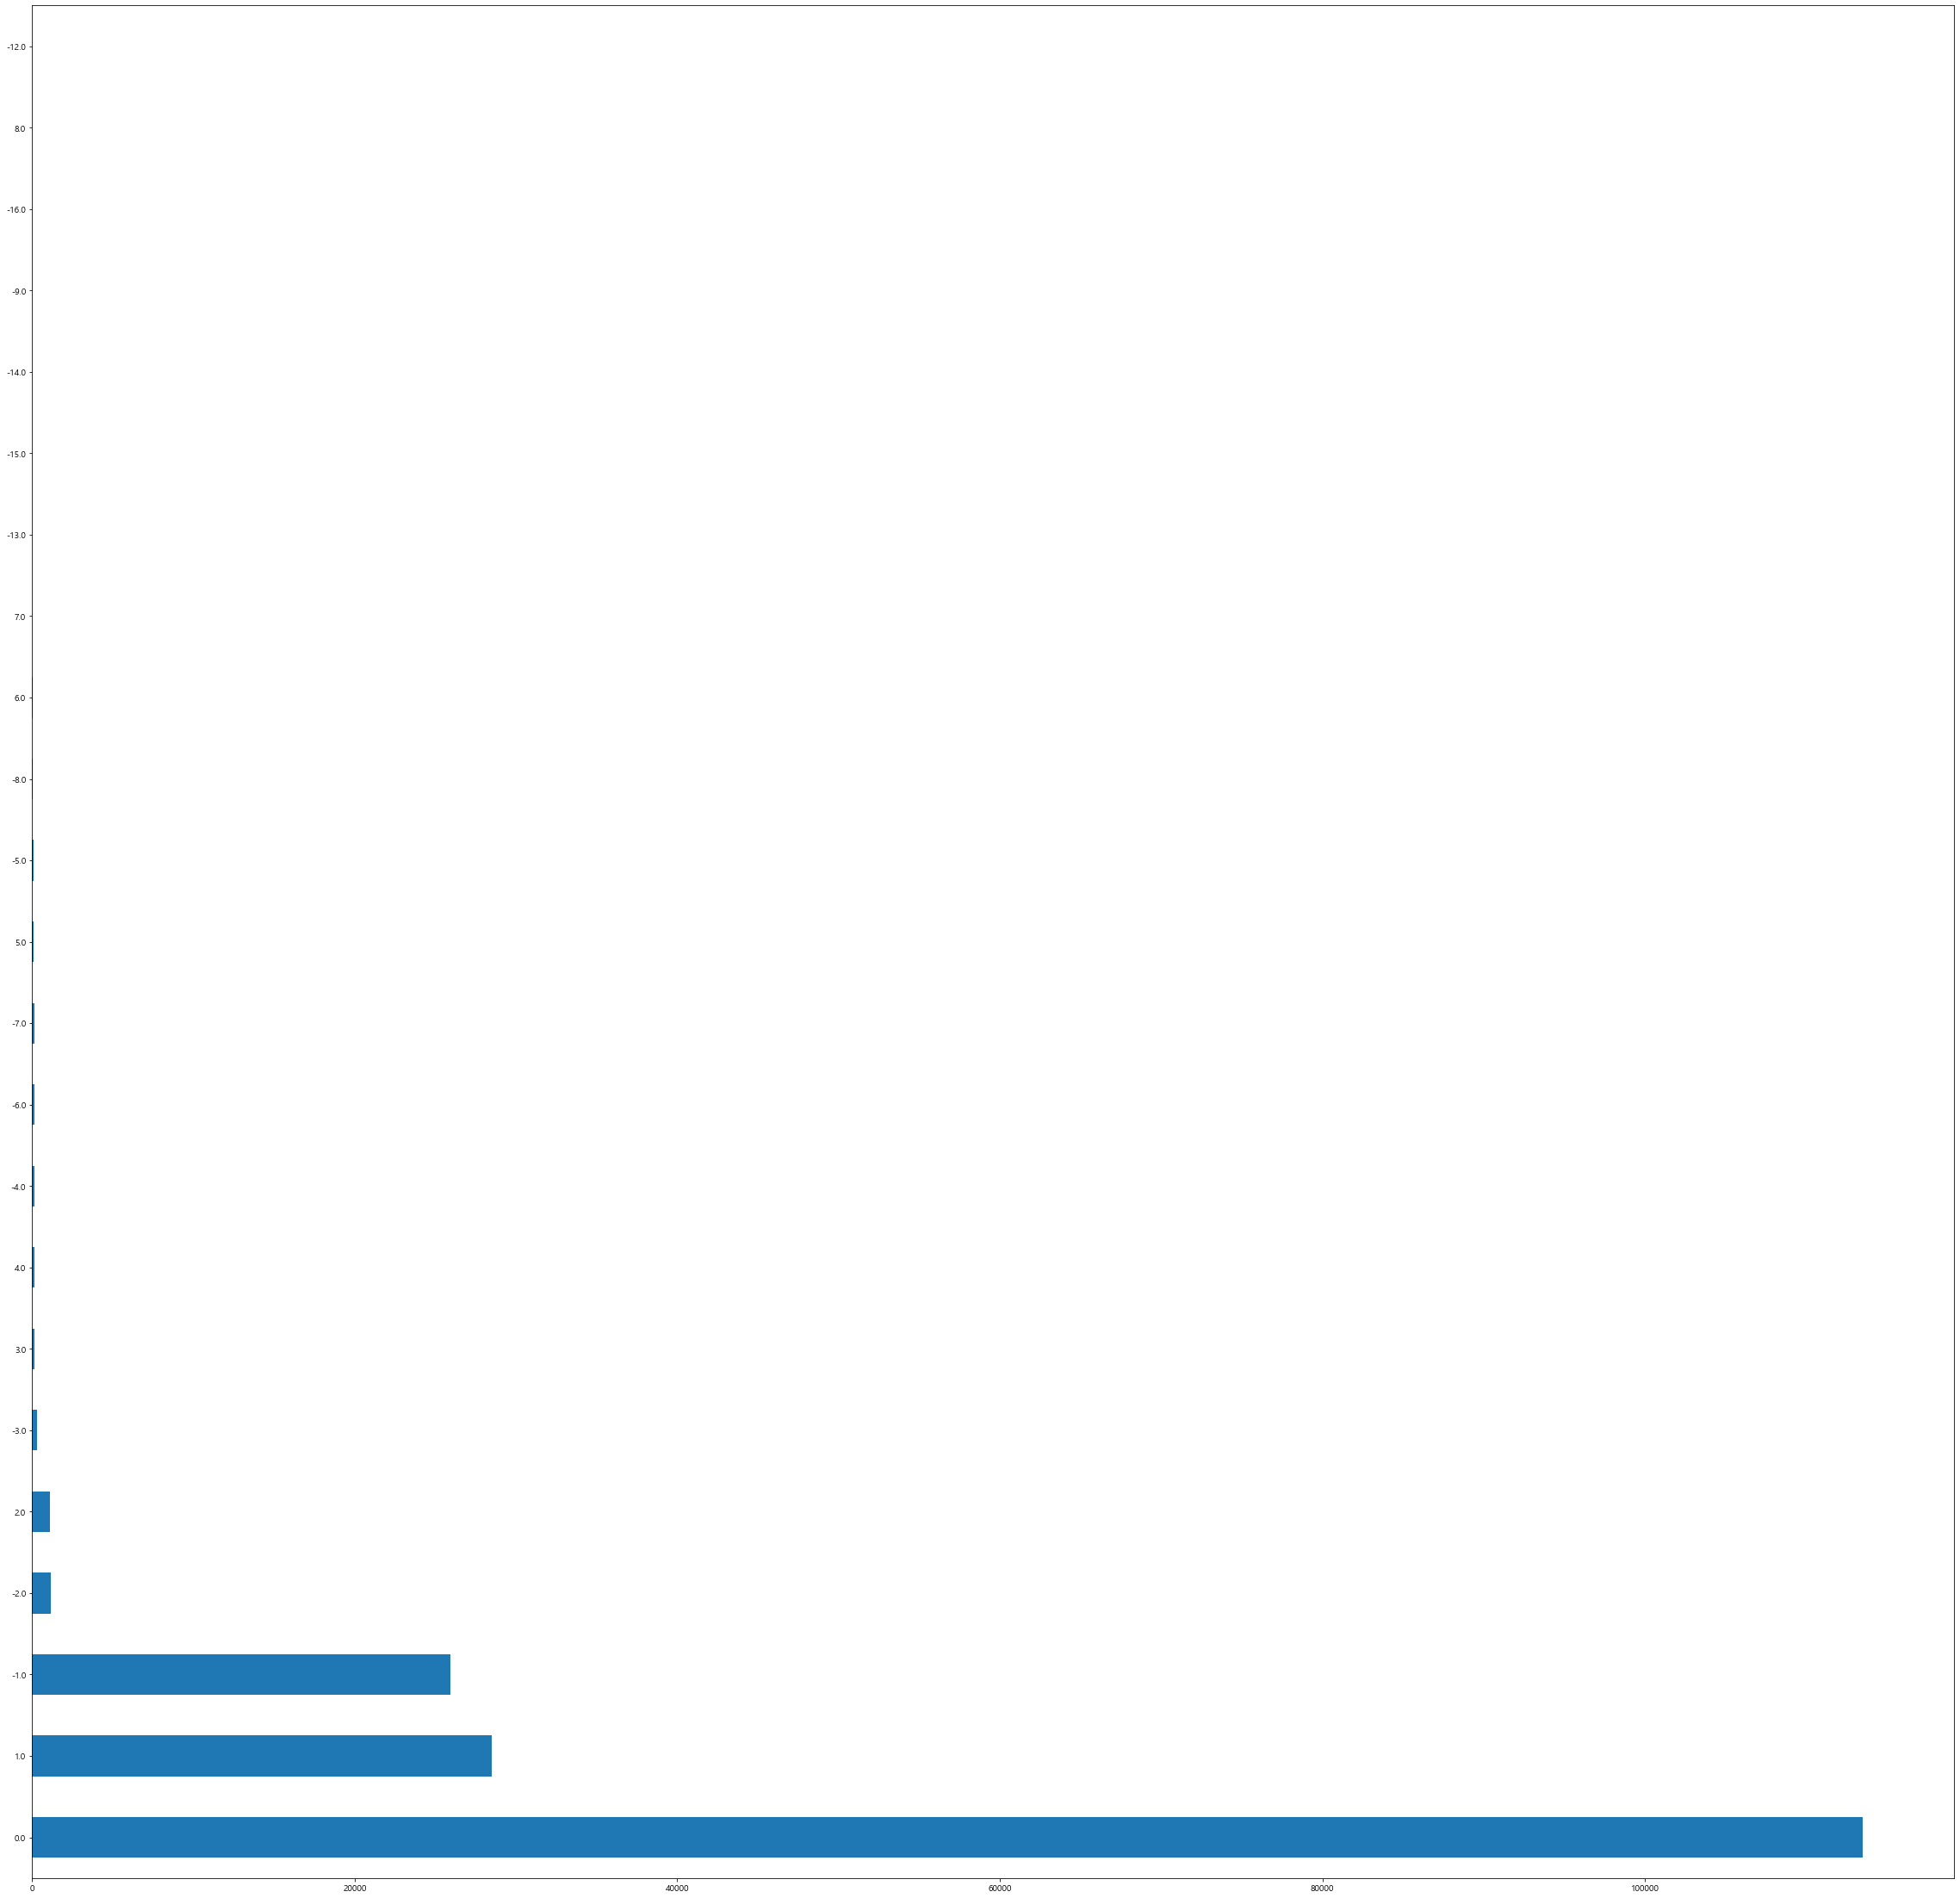

In [271]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [272]:
df_test['diff_int'].value_counts(ascending=False)

 0.0     113483
 1.0      28520
-1.0      25948
-2.0       1155
 2.0       1109
-3.0        284
 3.0        176
 4.0        152
-4.0        144
-6.0        135
-7.0        125
 5.0        122
-5.0         84
-8.0         49
 6.0         35
 7.0         10
-13.0        10
-15.0         5
-14.0         5
-9.0          3
-16.0         2
 8.0          1
-12.0         1
Name: diff_int, dtype: int64

In [273]:
df_test['예측지수'].round(0).value_counts()

92.0     5532
108.0    5360
93.0     5187
109.0    5063
107.0    5032
106.0    4938
94.0     4844
91.0     4733
89.0     4730
96.0     4714
110.0    4651
90.0     4639
105.0    4627
111.0    4602
88.0     4586
104.0    4578
95.0     4545
87.0     4524
112.0    4523
113.0    4515
97.0     4492
103.0    4428
98.0     4423
102.0    4415
101.0    4355
114.0    4326
86.0     4311
99.0     4293
115.0    4255
100.0    4149
85.0     4082
116.0    3705
84.0     3584
83.0     1905
117.0    1758
82.0     1153
118.0    1107
81.0     1001
119.0     949
120.0     908
80.0      873
121.0     795
79.0      784
122.0     683
78.0      671
77.0      611
123.0     606
76.0      592
75.0      550
124.0     531
125.0     475
126.0     432
74.0      420
73.0      395
127.0     335
72.0      322
128.0     321
129.0     317
71.0      305
70.0      291
130.0     267
69.0      204
131.0     199
68.0      164
67.0      135
133.0     131
132.0     129
65.0       96
66.0       89
64.0       64
63.0       48
62.0  

# 예측 나이 분포

In [274]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [275]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [276]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [277]:
df_plot = pd.DataFrame(y_test.value_counts())

In [278]:
df_plot.columns = ['count']

In [279]:
df_plot.reset_index(inplace=True)

In [280]:
df_plot = df_plot.sort_values('index', ascending=True)

In [281]:
df_plot

,index,count
81,52.0,1
80,53.0,2
78,54.0,6
77,55.0,10
79,56.0,5
76,57.0,18
74,58.0,23
75,59.0,23
73,60.0,33
72,61.0,35


In [282]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

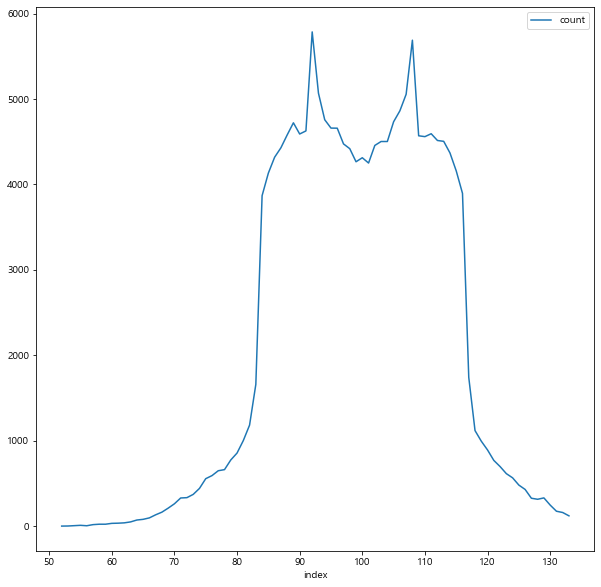

In [283]:
df_plot.plot()

In [284]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [285]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [286]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [287]:
df_plot.columns = ['count']

In [288]:
df_plot.reset_index(inplace=True)

In [289]:
df_plot = df_plot.sort_values(0, ascending=True)

In [290]:
df_plot.set_index(0, inplace=True)

In [291]:
df_plot

,count
0,
52.0,1
53.0,2
54.0,7
55.0,10
56.0,7
57.0,12
58.0,23
59.0,29
60.0,34


<AxesSubplot:xlabel='0'>

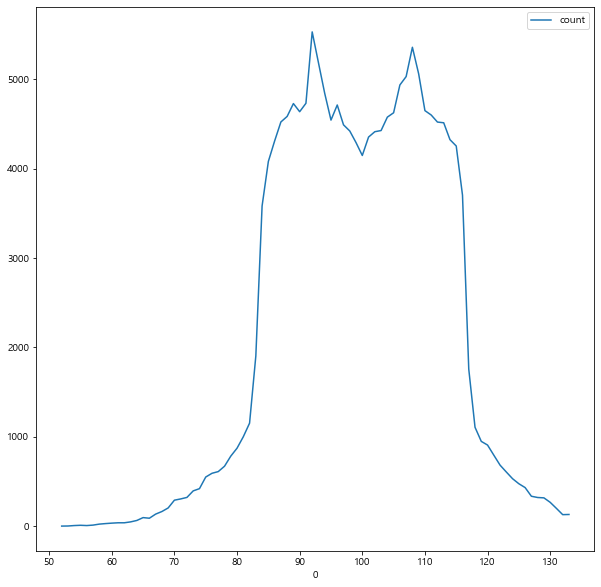

In [292]:
df_plot.plot()

# 시각화

In [293]:
# model.coef_

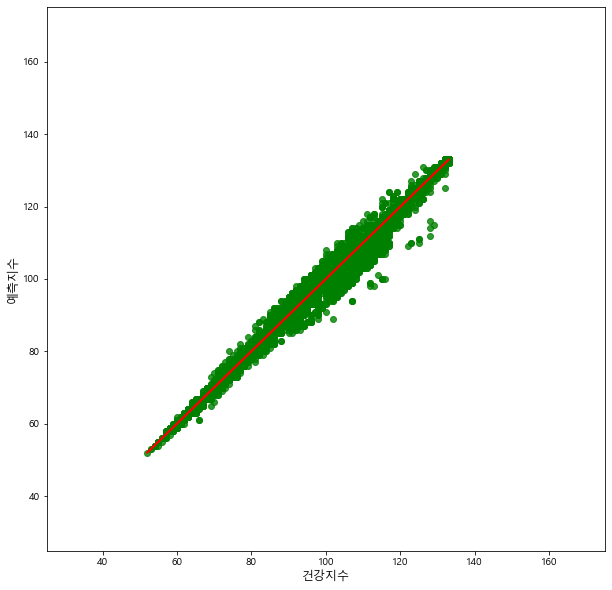

In [294]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [295]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
0,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0
1,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0
2,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0
3,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0
4,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0


In [296]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549040 entries, 0 to 549039
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               549040 non-null  int64  
 1   UID                549040 non-null  int64  
 2   CU_REC_ID          549040 non-null  int64  
 3   SEX                549040 non-null  int64  
 4   검진당시나이             549040 non-null  int64  
 5   공복시혈당(FBS)         549040 non-null  float64
 6   중성지방(TG)           549040 non-null  float64
 7   당화혈색소 (HbA1c)      549040 non-null  float64
 8   TyG                549040 non-null  float64
 9   공복시혈당(FBS)_kde     549040 non-null  float64
 10  당화혈색소 (HbA1c)_kde  549040 non-null  float64
 11  TyG_kde            549040 non-null  float64
 12  kde_mean           549040 non-null  float64
 13  target             549040 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 58.6 MB


In [297]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
84556,2022,168996,2259500,1,35,102.0,137.0,5.4,8.85,83.31,100.00,132.78,105.36,103.0
84557,2023,168996,2259499,1,36,97.0,76.0,5.2,8.21,145.84,130.47,128.15,134.82,117.0
84558,2024,168996,2281994,1,37,81.0,45.0,5.3,7.51,30.19,106.12,18.70,51.67,76.0


In [298]:
train_columns

['검진당시나이', '공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [299]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [300]:
len(df_pred)

549040

In [301]:
df_pred.reset_index(drop=True, inplace=True)

In [302]:
X_test

,검진당시나이,공복시혈당(FBS),당화혈색소 (HbA1c),TyG
428105,40,93.0,5.46,8.75
134463,44,117.0,5.40,9.25
21285,32,96.0,5.46,8.62
164395,40,98.0,5.46,9.30
539505,27,94.0,5.46,7.35
...,...,...,...,...
400665,50,80.0,4.90,8.47
432881,31,98.0,5.40,8.00
450571,42,99.0,5.70,8.78
40800,41,118.0,5.60,9.06


In [303]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG', '공복시혈당(FBS)_kde', '당화혈색소 (HbA1c)_kde',
       'TyG_kde', 'kde_mean', 'target'],
      dtype='object')

In [304]:
df_pred[train_columns]

,검진당시나이,공복시혈당(FBS),당화혈색소 (HbA1c),TyG
0,24,84.0,5.46,8.04
1,53,85.0,6.00,8.90
2,55,105.0,5.80,9.34
3,40,90.0,4.90,8.26
4,41,89.0,5.10,8.92
...,...,...,...,...
549035,29,90.0,5.50,8.63
549036,39,95.0,5.46,9.15
549037,26,88.0,5.50,8.19
549038,53,92.0,5.50,8.19


In [305]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [306]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [307]:
pred_data = pred_data.round(0)

In [308]:
pred_data

array([105.,  88.,  88., ..., 106., 101., 104.], dtype=float32)

In [309]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [310]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [311]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0,105.0
1,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0,88.0
2,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0,88.0
3,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0,121.0
4,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0,115.0
5,2021,62,699357,1,42,92.0,144.0,5.00,8.80,141.39,171.68,143.24,152.10,126.0,126.0
6,2022,62,1356310,1,43,79.0,91.0,5.46,8.19,17.98,100.00,101.00,72.99,86.0,86.0
7,2023,62,2170394,1,44,89.0,108.0,5.46,8.48,99.74,100.00,133.55,111.10,106.0,105.0
8,2019,67,410099,1,51,106.0,100.0,5.80,8.58,89.43,54.84,150.00,98.09,99.0,99.0
9,2020,67,481109,1,52,113.0,147.0,6.00,9.02,42.70,33.77,119.33,65.27,83.0,83.0


## 예측지수 성능평가

In [312]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.38839246685123124

# target으로 나이 계산

In [313]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [314]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,84.0,74.00,5.46,8.04,83.75,100.00,146.15,109.97,105.0,105.0,23.0
1,2019,50,356493,1,53,85.0,172.00,6.00,8.90,50.17,36.94,134.78,73.96,87.0,88.0,55.4
2,2021,50,642497,1,55,105.0,217.00,5.80,9.34,98.89,67.01,61.73,75.88,88.0,88.0,57.4
3,2019,62,421626,1,40,90.0,86.00,4.90,8.26,129.43,181.98,118.49,143.30,122.0,121.0,35.8
4,2020,62,565527,1,41,89.0,168.00,5.10,8.92,104.05,153.70,135.92,131.22,116.0,115.0,38.0
5,2021,62,699357,1,42,92.0,144.00,5.00,8.80,141.39,171.68,143.24,152.10,126.0,126.0,36.8
6,2022,62,1356310,1,43,79.0,91.00,5.46,8.19,17.98,100.00,101.00,72.99,86.0,86.0,45.8
7,2023,62,2170394,1,44,89.0,108.00,5.46,8.48,99.74,100.00,133.55,111.10,106.0,105.0,43.0
8,2019,67,410099,1,51,106.0,100.00,5.80,8.58,89.43,54.84,150.00,98.09,99.0,99.0,51.2
9,2020,67,481109,1,52,113.0,147.00,6.00,9.02,42.70,33.77,119.33,65.27,83.0,83.0,55.4


## 예측나이 성능평가

In [315]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.911430861139443

# 최종 산출

In [316]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,84.0,74.0,5.46,8.04,83.75,100.00,146.15,109.97,105.0,105.0,23.0
1,2019,50,356493,1,53,85.0,172.0,6.00,8.90,50.17,36.94,134.78,73.96,87.0,88.0,55.4
2,2021,50,642497,1,55,105.0,217.0,5.80,9.34,98.89,67.01,61.73,75.88,88.0,88.0,57.4
3,2019,62,421626,1,40,90.0,86.0,4.90,8.26,129.43,181.98,118.49,143.30,122.0,121.0,35.8
4,2020,62,565527,1,41,89.0,168.0,5.10,8.92,104.05,153.70,135.92,131.22,116.0,115.0,38.0


# DataMart csv

In [317]:
df_copy = df.copy()

In [318]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
0,2010,7282,2520,1,42,83.0,98.0,NaN
1,2010,7490,3638,1,39,125.0,103.0,NaN
2,2010,7915,3997,1,36,104.0,547.0,NaN
3,2010,8056,4745,1,42,89.0,378.0,NaN
4,2010,8457,3929,1,38,121.0,154.0,NaN


In [319]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   공복시혈당(FBS)     1199640 non-null  float64
 6   중성지방(TG)       1147041 non-null  float64
 7   당화혈색소 (HbA1c)  758186 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [320]:
minimums

[68.5, -52.0, 4.45]

In [321]:
maximums

[120.5, 268.0, 6.45]

In [322]:
train_columns

['검진당시나이', '공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [323]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [324]:
target_cols_temp

['공복시혈당(FBS)', '중성지방(TG)', '당화혈색소 (HbA1c)']

In [325]:
for idx, col in enumerate(target_cols_temp):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [326]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [327]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
0,2010,7282,2520,1,42,83.0,98.0,NaN
1,2010,7490,3638,1,39,120.5,103.0,NaN
2,2010,7915,3997,1,36,104.0,268.0,NaN
3,2010,8056,4745,1,42,89.0,268.0,NaN
4,2010,8457,3929,1,38,120.5,154.0,NaN


## 스크리닝

In [328]:
screening = 50

In [329]:
scr_col = '공복시혈당(FBS)'

In [330]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [331]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [332]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [333]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [334]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [335]:
len(df_man_csv)

765459

## 변수 생성

In [336]:
df_man_csv['TyG'] = np.log((df_man_csv['공복시혈당(FBS)'] * df_man_csv['중성지방(TG)']) / 2)

In [337]:
df_man_csv['TyG'] = df_man_csv['TyG'].round(2)

In [338]:
df_man_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG'],
      dtype='object')

## 검진 항목 all 결측치 지우기

In [339]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [340]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [341]:
df_man_csv.reset_index(drop=True, inplace=True)

In [342]:
len(df_man_csv)

760385

## fillna

In [343]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 모델 예측

In [344]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [345]:
pred_data = pred_data.round(0)

In [346]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [347]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수
0,2010,7282,2520,1,42,83.0,98.0,5.46,8.31,97.0
1,2010,7490,3638,1,39,120.5,103.0,5.46,8.73,92.0
2,2010,7915,3997,1,36,104.0,268.0,5.46,9.54,83.0
3,2010,8056,4745,1,42,89.0,268.0,5.46,9.39,96.0
4,2010,8457,3929,1,38,120.5,154.0,5.46,9.14,85.0


### 성능 평가

In [348]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [349]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [350]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [351]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.2407554068005022


In [352]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.8952944336809137

In [353]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
0,2010,7282,2520,1,42,83.0,98.0,5.46,8.31,97.0,42.6
1,2010,7490,3638,1,39,120.5,103.0,5.46,8.73,92.0,40.6
2,2010,7915,3997,1,36,104.0,268.0,5.46,9.54,83.0,39.4
3,2010,8056,4745,1,42,89.0,268.0,5.46,9.39,96.0,42.8
4,2010,8457,3929,1,38,120.5,154.0,5.46,9.14,85.0,41.0


In [354]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760385 entries, 0 to 760384
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           760385 non-null  int64  
 1   UID            760385 non-null  int64  
 2   CU_REC_ID      760385 non-null  int64  
 3   SEX            760385 non-null  int64  
 4   검진당시나이         760385 non-null  int64  
 5   공복시혈당(FBS)     760385 non-null  float64
 6   중성지방(TG)       760385 non-null  float64
 7   당화혈색소 (HbA1c)  760385 non-null  float64
 8   TyG            760385 non-null  float64
 9   예측지수           760385 non-null  float32
 10  예측나이           760385 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 60.9 MB


# 최종 UID별 확인

In [355]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
285482,2022,175673,751348,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285483,2022,175673,1463838,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285420,2022,175673,1919125,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285484,2022,175673,2169120,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285421,2022,175673,2223795,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285422,2022,175673,2237465,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285485,2022,175673,2238320,1,48,101.0,133.0,5.9,8.81,103.0,47.4
285486,2022,175673,2246042,1,48,101.0,133.0,5.9,8.81,103.0,47.4
454684,2023,175673,1463893,1,49,95.0,44.0,5.6,7.64,93.0,50.4
454680,2023,175673,1919126,1,49,95.0,44.0,5.6,7.64,93.0,50.4


In [356]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
206898,2021,289587,796178,1,47,96.0,203.0,5.1,9.18,119.0,43.2
318576,2022,289587,866076,1,48,93.0,268.0,5.1,9.43,112.0,45.6
318531,2022,289587,2115999,1,48,93.0,268.0,5.1,9.43,112.0,45.6
107298,2022,289587,2603574,1,48,93.0,268.0,5.1,9.43,112.0,45.6
506030,2023,289587,1487447,1,49,84.0,259.0,5.0,9.29,101.0,48.8
506031,2023,289587,2227964,1,49,84.0,259.0,5.0,9.29,101.0,48.8
695752,2024,289587,2243723,1,50,87.0,231.0,5.1,9.22,104.0,49.2
695730,2024,289587,2603575,1,50,87.0,231.0,5.1,9.22,104.0,49.2


In [357]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
423476,2022,897603,1066133,1,51,120.5,105.0,5.9,8.75,83.0,54.4
423489,2022,897603,1068885,1,51,120.5,105.0,5.9,8.75,83.0,54.4
423491,2022,897603,1728532,1,51,120.5,105.0,5.9,8.75,83.0,54.4
423492,2022,897603,2555144,1,51,120.5,105.0,5.9,8.75,83.0,54.4
600463,2023,897603,1458387,1,52,108.0,114.0,5.6,8.73,103.0,51.4
600465,2023,897603,1728531,1,52,108.0,114.0,5.6,8.73,103.0,51.4
588973,2023,897603,2120063,1,52,108.0,114.0,5.6,8.73,103.0,51.4
588974,2023,897603,2351665,1,52,108.0,114.0,5.6,8.73,103.0,51.4
600466,2023,897603,2555143,1,52,108.0,114.0,5.6,8.73,103.0,51.4
588975,2023,897603,2622260,1,52,108.0,114.0,5.6,8.73,103.0,51.4


In [358]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
268910,2022,119172,751336,1,41,94.0,72.0,5.0,8.13,118.0,37.4
268911,2022,119172,1432355,1,41,94.0,72.0,5.0,8.13,118.0,37.4
268908,2022,119172,1432476,1,41,94.0,72.0,5.0,8.13,118.0,37.4
268912,2022,119172,2247083,1,41,94.0,72.0,5.0,8.13,118.0,37.4
268913,2022,119172,2252956,1,41,94.0,72.0,5.0,8.13,118.0,37.4
440303,2023,119172,1436742,1,42,97.0,93.0,5.1,8.41,122.0,37.6
440304,2023,119172,2247082,1,42,97.0,93.0,5.1,8.41,122.0,37.6
440305,2023,119172,2252955,1,42,97.0,93.0,5.1,8.41,122.0,37.6
677261,2024,119172,2250063,1,43,97.0,79.0,5.0,8.25,120.0,39.0
677262,2024,119172,2252954,1,43,97.0,79.0,5.0,8.25,120.0,39.0


In [359]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
600458,2023,897595,1525045,1,40,105.0,73.0,5.6,8.25,97.0,40.6
600459,2023,897595,1593851,1,40,105.0,73.0,5.6,8.25,97.0,40.6
600456,2023,897595,2005289,1,40,105.0,73.0,5.6,8.25,97.0,40.6
600457,2023,897595,2138998,1,40,105.0,73.0,5.6,8.25,97.0,40.6
584490,2023,897595,2320478,1,40,105.0,73.0,5.6,8.25,97.0,40.6
600460,2023,897595,2328772,1,40,105.0,73.0,5.6,8.25,97.0,40.6
737922,2024,897595,2329051,1,41,94.0,86.0,5.7,8.30,104.0,40.2


In [360]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
370117,2022,492764,909688,1,39,110.0,104.0,5.7,8.65,92.0,40.6
370118,2022,492764,1575802,1,39,110.0,104.0,5.7,8.65,92.0,40.6
370121,2022,492764,1668547,1,39,110.0,104.0,5.7,8.65,92.0,40.6
370119,2022,492764,2246777,1,39,110.0,104.0,5.7,8.65,92.0,40.6
370120,2022,492764,2330256,1,39,110.0,104.0,5.7,8.65,92.0,40.6
156666,2022,492764,2343199,1,39,110.0,104.0,5.7,8.65,92.0,40.6
175335,2022,492764,2363393,1,39,110.0,104.0,5.7,8.65,92.0,40.6
175336,2022,492764,2639564,1,39,110.0,104.0,5.7,8.65,92.0,40.6
175337,2022,492764,2703924,1,39,110.0,104.0,5.7,8.65,92.0,40.6
370122,2022,492764,2783328,1,39,110.0,104.0,5.7,8.65,92.0,40.6


In [361]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
604891,2023,933936,1431742,1,40,104.0,133.0,6.1,8.84,92.0,41.6
604892,2023,933936,1435266,1,40,104.0,133.0,6.1,8.84,92.0,41.6
739267,2024,933936,2242997,1,41,97.0,227.0,6.0,9.31,92.0,42.6


In [362]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
282931,2022,168996,919754,1,35,102.0,137.0,5.4,8.85,104.0,34.2
282932,2022,168996,1425925,1,35,102.0,137.0,5.4,8.85,104.0,34.2
282933,2022,168996,2259500,1,35,102.0,137.0,5.4,8.85,104.0,34.2
452416,2023,168996,1425970,1,36,97.0,76.0,5.2,8.21,117.0,32.6
452417,2023,168996,1475832,1,36,97.0,76.0,5.2,8.21,117.0,32.6
452418,2023,168996,2259499,1,36,97.0,76.0,5.2,8.21,117.0,32.6
682513,2024,168996,2281994,1,37,81.0,45.0,5.3,7.51,76.0,41.8


# 여성 모델

In [363]:
df_target['SEX'].value_counts()

1    654392
2    431549
Name: SEX, dtype: int64

In [364]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

431549

# 결측치 처리

## 결측치 삭제

In [365]:
# df_woman.dropna(inplace=True)

In [366]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
696098,2010,710490,213,2,28,84.0,42.0,NaN,7.48,105.34,100.0,87.58,97.64,99.0
657810,2010,315847,230,2,23,84.0,38.0,NaN,7.38,105.43,100.0,55.02,86.82,93.0
660156,2010,719072,231,2,24,95.0,43.0,NaN,7.62,93.67,100.0,122.70,105.46,103.0
920103,2010,552037,332,2,41,80.0,71.0,NaN,7.95,59.08,100.0,144.30,101.13,101.0
696099,2010,710522,632,2,28,88.0,30.0,NaN,7.19,143.64,100.0,25.61,89.75,95.0


## 결측치 평균으로 대체

In [367]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [368]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [369]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [370]:
len(df_woman)

431549

In [371]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [372]:
len(df_woman)

428903

In [373]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
696098,2010,710490,213,2,28,84.0,42.0,NaN,7.48,105.34,100.0,87.58,97.64,99.0
657810,2010,315847,230,2,23,84.0,38.0,NaN,7.38,105.43,100.0,55.02,86.82,93.0
660156,2010,719072,231,2,24,95.0,43.0,NaN,7.62,93.67,100.0,122.70,105.46,103.0
920103,2010,552037,332,2,41,80.0,71.0,NaN,7.95,59.08,100.0,144.30,101.13,101.0
696099,2010,710522,632,2,28,88.0,30.0,NaN,7.19,143.64,100.0,25.61,89.75,95.0


In [374]:
len(df_woman)

428903

## fillna

In [375]:
df_woman.mean().round(2)

검진년도                    2021.84
UID                   497509.10
CU_REC_ID            1483296.51
SEX                        2.00
검진당시나이                    38.39
공복시혈당(FBS)                90.85
중성지방(TG)                  81.64
당화혈색소 (HbA1c)              5.34
TyG                        8.12
공복시혈당(FBS)_kde           102.69
당화혈색소 (HbA1c)_kde         99.62
TyG_kde                  104.48
kde_mean                 102.27
target                   101.13
dtype: float64

In [376]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [377]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [378]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [379]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [380]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
696098,2010,710490,213,2,28,84.0,42.0,5.34,7.48,105.34,100.0,87.58,97.64,99.0
657810,2010,315847,230,2,23,84.0,38.0,5.34,7.38,105.43,100.0,55.02,86.82,93.0
660156,2010,719072,231,2,24,95.0,43.0,5.34,7.62,93.67,100.0,122.70,105.46,103.0
920103,2010,552037,332,2,41,80.0,71.0,5.34,7.95,59.08,100.0,144.30,101.13,101.0
696099,2010,710522,632,2,28,88.0,30.0,5.34,7.19,143.64,100.0,25.61,89.75,95.0


# 스크리닝

## 스크리닝

In [381]:
# screening = 80

In [382]:
# scr_col = 'ALP'

In [383]:
# df_woman[df_woman[scr_col] < screening].head()

In [384]:
# len(df_woman[df_woman[scr_col] < screening])

In [385]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [386]:
# df_woman[df_woman[scr_col] < screening].head()

In [387]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [388]:
len(df_woman)

428903

In [389]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [390]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
794886,2022,48,1140655,2,34,105.0,200.00,5.34,9.26,23.28,100.00,9.67,44.32,72.0
675464,2021,53,2632765,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0
675463,2021,53,664316,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0
701379,2023,53,2632764,2,28,96.0,81.64,5.34,8.12,82.40,100.00,100.00,94.13,97.0
724393,2024,53,2658222,2,29,101.0,76.00,5.40,8.25,38.50,74.41,111.53,74.81,87.0
728344,2020,54,497669,2,30,83.0,68.00,4.80,7.95,104.98,163.09,149.22,139.10,120.0
765967,2022,54,1319859,2,32,85.0,50.00,5.40,7.66,126.83,83.18,98.73,102.91,101.0
785486,2023,54,2039511,2,33,87.0,72.00,5.10,8.05,138.35,114.01,149.57,133.98,117.0
807697,2024,54,2750990,2,34,85.0,110.00,5.00,8.45,123.00,145.77,81.91,116.89,108.0
726582,2019,56,1605927,2,30,90.0,81.64,5.34,8.12,149.81,100.00,100.00,116.60,108.0


## first만 남겨두고 중복 제거

In [391]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [392]:
df_woman.reset_index(drop=True, inplace=True)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

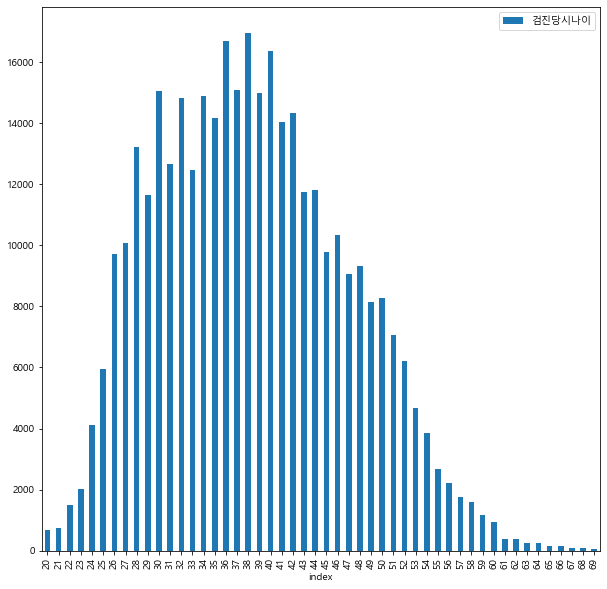

In [393]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [394]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,671
39,21,748
36,22,1480
33,23,2008
29,24,4116
27,25,5964
20,26,9734
18,27,10095
11,28,13220
16,29,11668


# 검진항목 시각화

In [395]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
count,364686.000000,3.646860e+05,3.646860e+05,364686.0,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000,364686.000000
mean,2021.773956,4.924776e+05,1.471513e+06,2.0,38.419879,90.955282,81.690140,5.337280,8.119388,102.526742,99.811951,104.339539,102.226087,101.113728
std,1.738654,3.643595e+05,8.086914e+05,0.0,8.487305,8.281405,37.717661,0.229525,0.446403,42.581965,31.437910,40.528365,24.162765,12.083323
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,69.000000,0.900000,4.450000,3.810000,0.110000,0.000000,0.000000,0.640000,50.000000
25%,2021.000000,2.153270e+05,6.453995e+05,2.0,32.000000,85.000000,56.000000,5.300000,7.820000,71.350000,99.360000,78.620000,87.430000,94.000000
50%,2022.000000,3.692785e+05,1.382882e+06,2.0,38.000000,90.850000,74.000000,5.340000,8.120000,114.400000,100.000000,112.860000,105.470000,103.000000
75%,2023.000000,8.222612e+05,2.172001e+06,2.0,44.000000,96.000000,95.000000,5.400000,8.380000,140.640000,100.800000,140.320000,120.020000,110.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,120.400000,268.000000,6.440000,9.690000,150.250000,199.870000,150.000000,166.330000,133.000000


<AxesSubplot:xlabel='검진당시나이'>

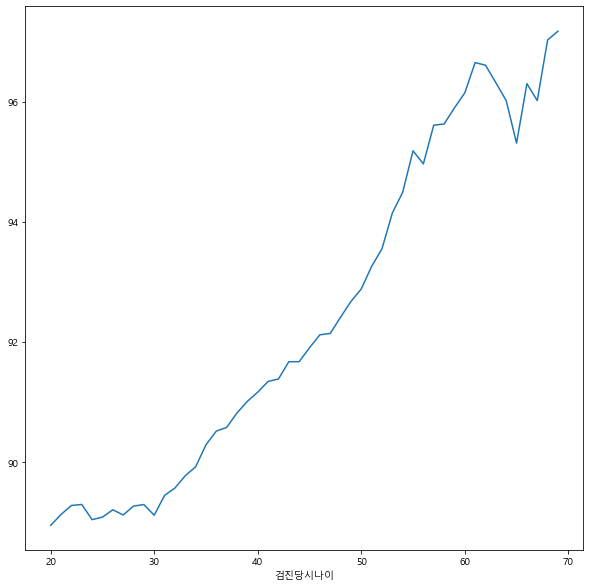

In [396]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

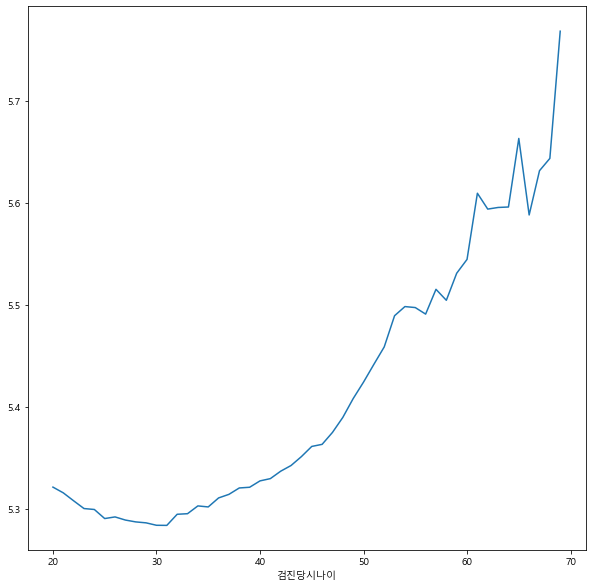

In [397]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [398]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

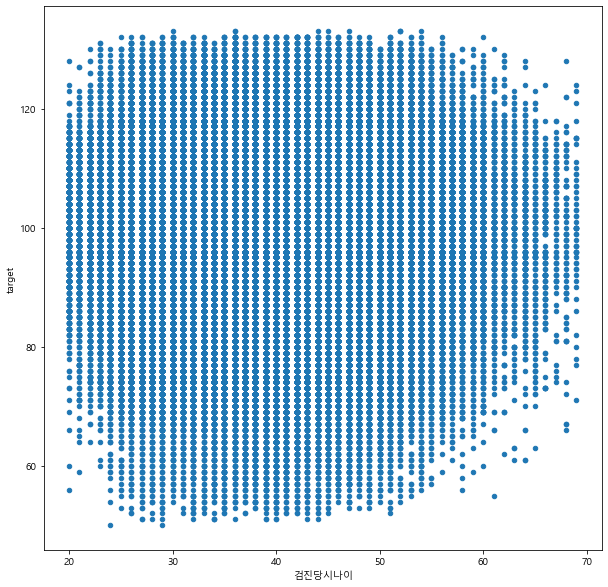

In [399]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

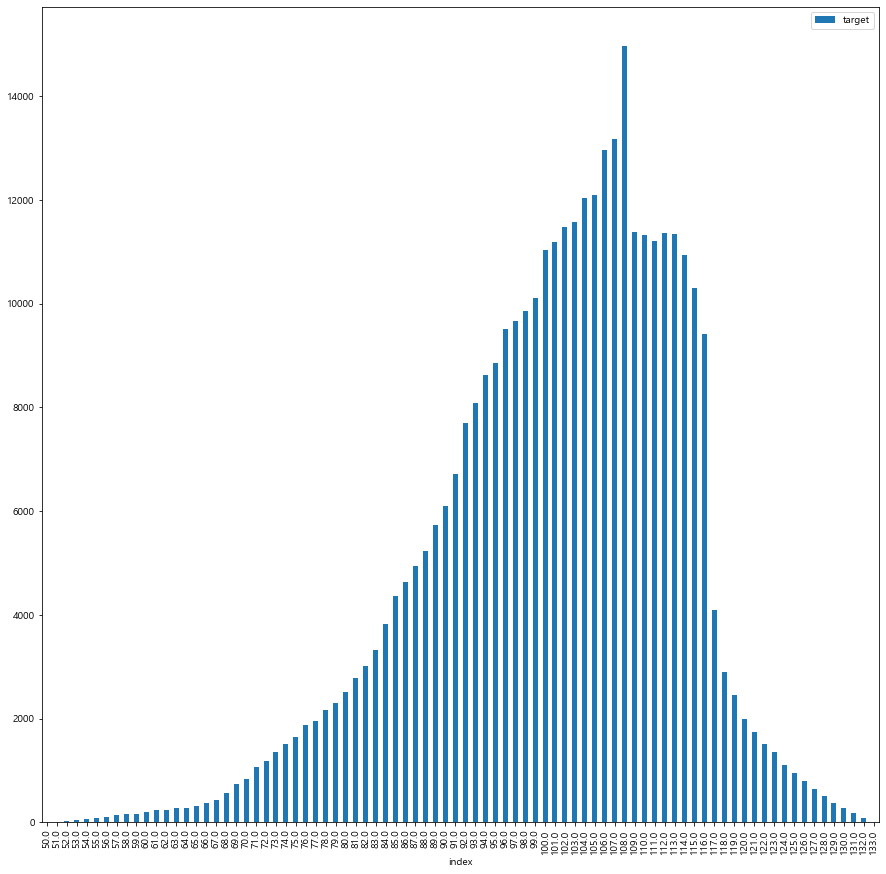

In [400]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [401]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
83,50.0,2
81,51.0,15
80,52.0,25
79,53.0,47
78,54.0,72
76,55.0,90
75,56.0,105
74,57.0,135
73,58.0,163
72,59.0,163


In [402]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [403]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

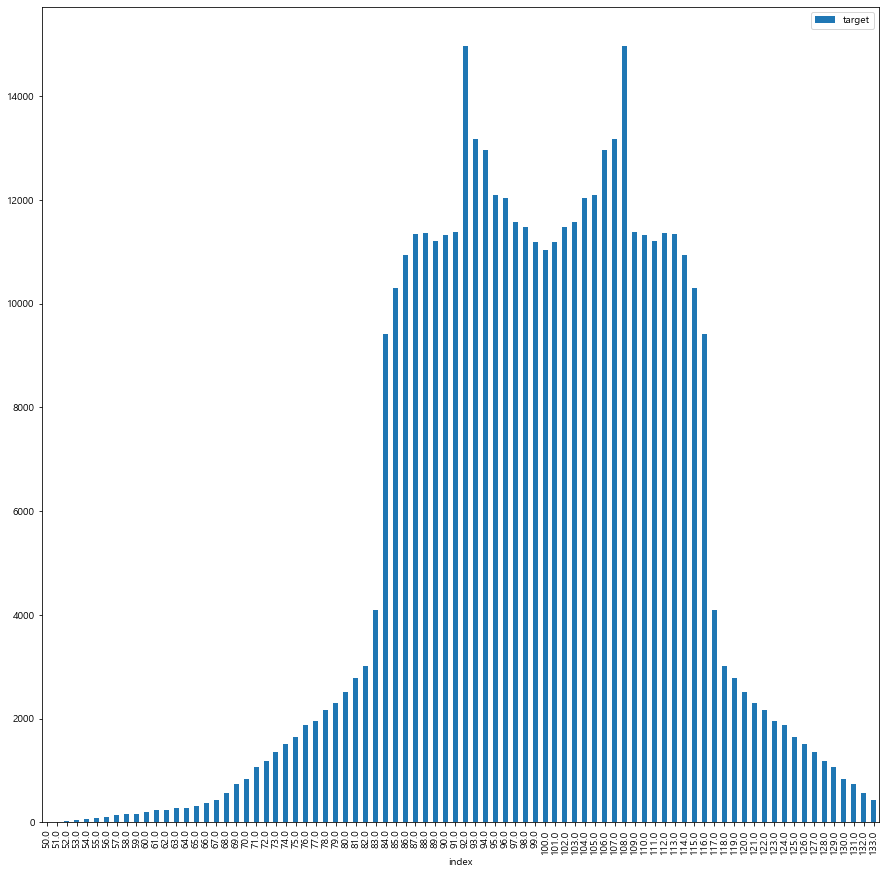

In [404]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [405]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
83,50.0,2
82,51.0,15
81,52.0,25
80,53.0,47
79,54.0,72
78,55.0,90
77,56.0,105
76,57.0,135
75,58.0,163
74,59.0,163


# 나이별 확인하기

In [406]:
# df_woman['검진당시나이'].value_counts()

In [407]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [408]:
# df_woman['검진당시나이'].min()

In [409]:
# df_woman['검진당시나이'].max()

In [410]:
# df_woman.columns

In [411]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [412]:
# df_temp.info()

In [413]:
# df_temp.reset_index(drop=True, inplace=True)

In [414]:
# df_woman = df_temp.copy()

In [415]:
# df_woman['검진당시나이'].value_counts()

In [416]:
# df_woman[df_woman['검진당시나이']==20]

In [417]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [418]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [419]:
train_columns

['검진당시나이', '공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [420]:
# target_col = '검진당시나이'

In [421]:
target_col

'target'

## Min Max Scaling

In [422]:
from sklearn.preprocessing import MinMaxScaler

In [423]:
scaling_bool

False

In [424]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [425]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [426]:
# model2 = LinearRegression()

In [427]:
# model2.fit(X_train2, y_train2)

In [428]:
# model2.intercept_

In [429]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [430]:
model2 = XGBRegressor()

In [431]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [432]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [433]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1714.78 seconds for 10 candidates parameter settings.


In [434]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [435]:
# best score
random_search.best_score_

-0.5028976215172283

In [436]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [437]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [438]:
# model = build_model()

In [439]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [440]:
# model.summary()

In [441]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [442]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [443]:
# plot_history(history)

## pyTorch 신경망

In [444]:
np.shape(X_train)[1]

4

In [445]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [446]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [447]:
# epochs = 1000

In [448]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [449]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [450]:
# plt.plot(losses)

## coef 계산

In [451]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [452]:
# df_coef2.columns = ['검사항목', 'coef']

In [453]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [454]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [455]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [456]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [457]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [458]:
# slr2 = LinearRegression()

In [459]:
# slr2.fit(X_train2_poly, y_train2)

In [460]:
# np.shape(X_train2)

In [461]:
# np.shape(X_train2_poly)

In [462]:
# np.shape(X_test2)

In [463]:
# np.shape(X_test2_poly)

In [464]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [465]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [466]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [467]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [468]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [469]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [470]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [471]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.45371310521588437
MSE : 0.4806197162698044
RMSE : 0.6932674204589484


In [472]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9968746373987296

In [473]:
model2.score(X_test2, y_test2)

0.9968746373987296

## feature importance

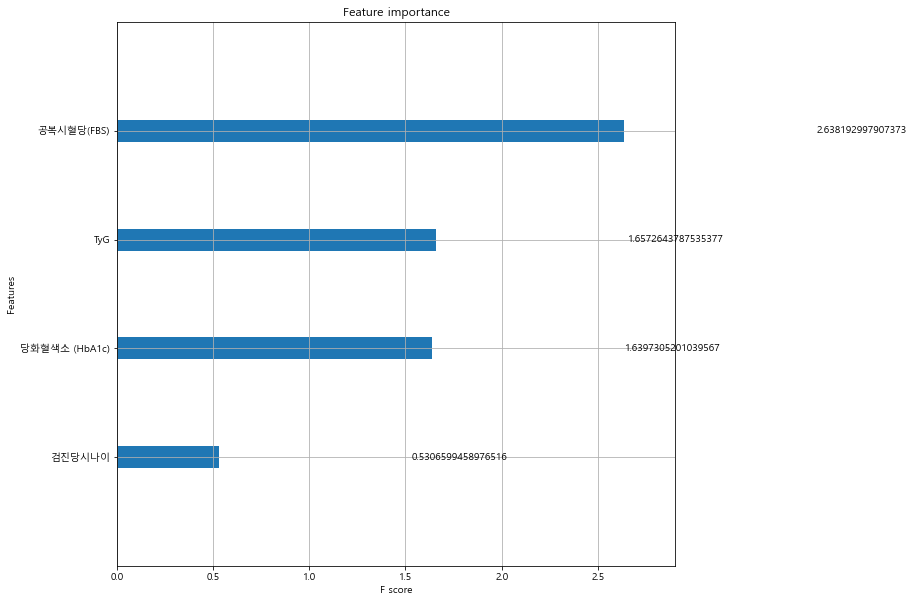

In [474]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [475]:
model2.feature_importances_

array([0.08207121, 0.40801966, 0.25359872, 0.25631046], dtype=float32)

In [476]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [477]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,공복시혈당(FBS),0.408020
3,TyG,0.256310
2,당화혈색소 (HbA1c),0.253599
0,검진당시나이,0.082071


# 실제나이 - 예측나이 결과

In [478]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [479]:
df_test2.head()

,target,0
0,83.0,82.791275
1,84.0,83.278679
2,102.0,101.639946
3,87.0,87.502411
4,116.0,116.263359


In [480]:
df_test2.columns

Index(['target', 0], dtype='object')

In [481]:
df_test2.columns = ['실제지수', '예측지수']

In [482]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [483]:
df_test2.head()

,실제지수,예측지수,diff
0,83.0,82.791275,-0.208725
1,84.0,83.278679,-0.721321
2,102.0,101.639946,-0.360054
3,87.0,87.502411,0.502411
4,116.0,116.263359,0.263359


In [484]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [485]:
len(df_test2)

111843

In [486]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,83.0,82.791275,-0.208725,-0.0
1,84.0,83.278679,-0.721321,-1.0
2,102.0,101.639946,-0.360054,-0.0
3,87.0,87.502411,0.502411,1.0
4,116.0,116.263359,0.263359,0.0


<AxesSubplot:>

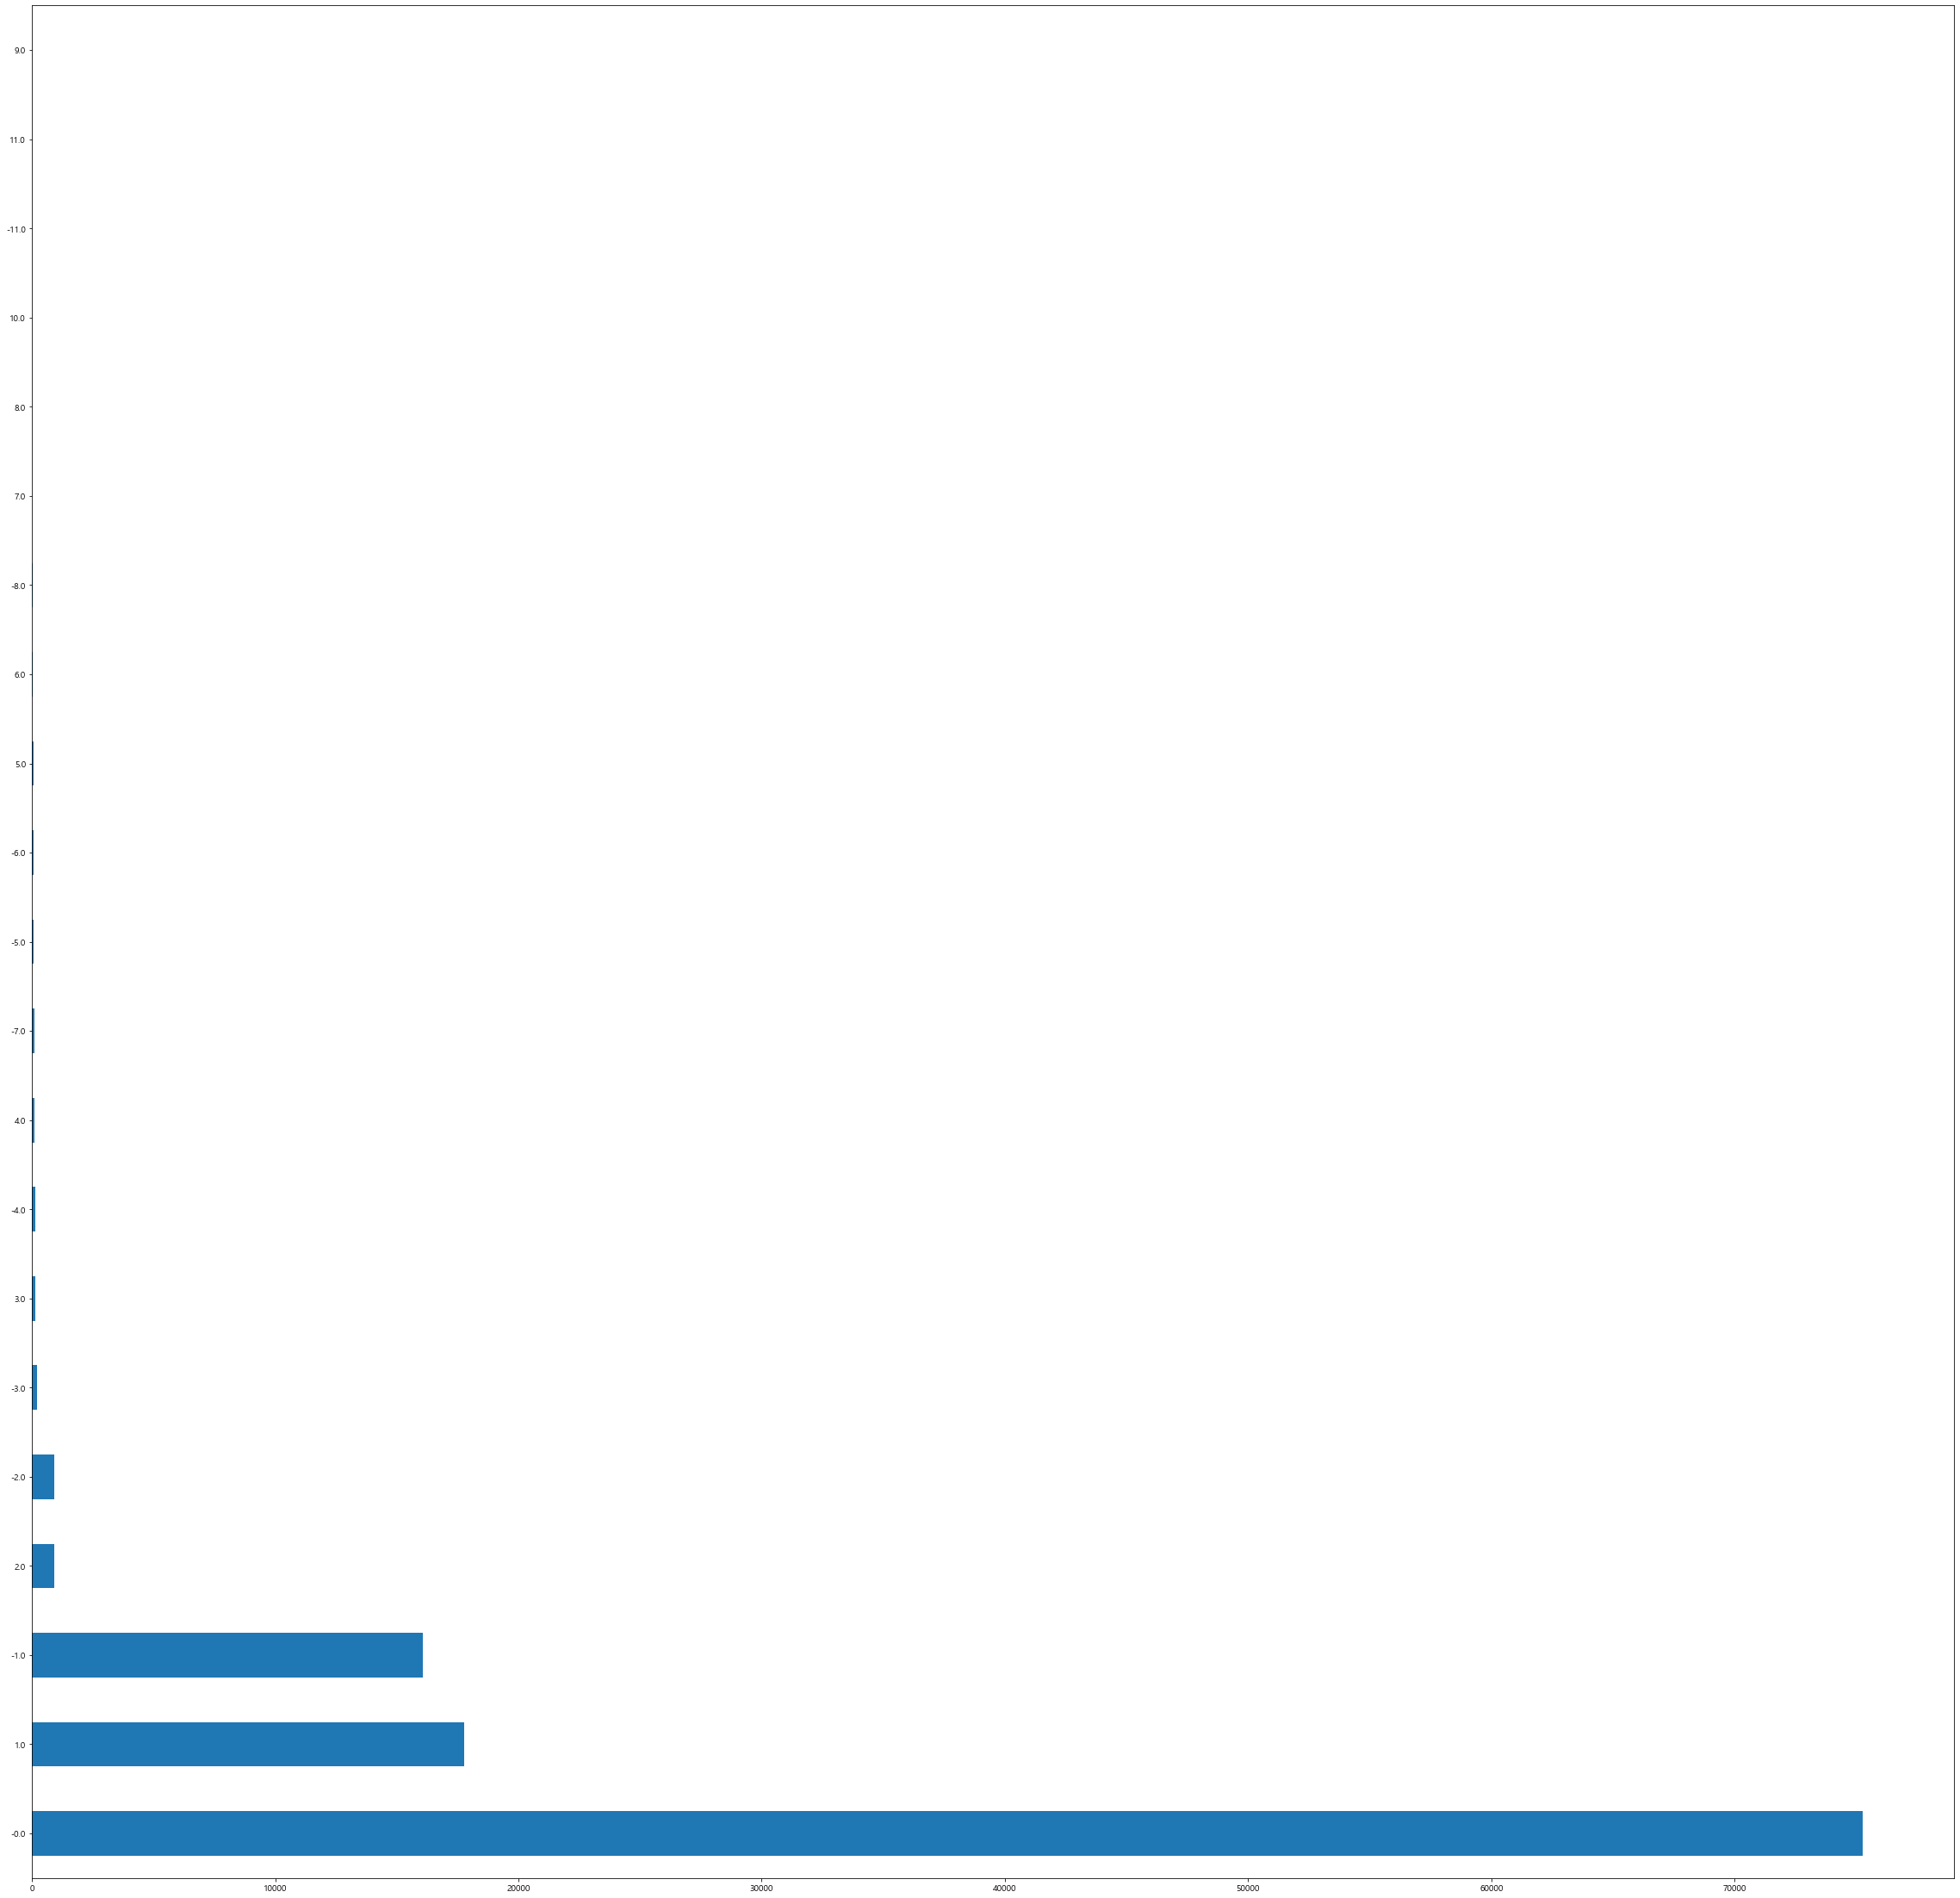

In [487]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [488]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [489]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [490]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [491]:
df_train2.round(0).value_counts()

108.0    11082
92.0     10497
93.0     10237
107.0    10174
94.0      9681
105.0     9494
109.0     9332
106.0     9199
95.0      9160
91.0      8963
104.0     8893
96.0      8754
97.0      8733
103.0     8719
110.0     8718
98.0      8617
99.0      8569
112.0     8559
89.0      8526
90.0      8512
87.0      8512
113.0     8495
88.0      8485
101.0     8466
111.0     8320
102.0     8289
86.0      8229
100.0     8132
85.0      7877
114.0     7826
115.0     7577
116.0     6647
84.0      6608
117.0     3406
83.0      3311
82.0      2282
118.0     2202
119.0     2107
81.0      2064
120.0     1927
80.0      1862
121.0     1709
79.0      1704
78.0      1655
122.0     1592
77.0      1504
123.0     1458
124.0     1444
76.0      1364
75.0      1245
125.0     1218
74.0      1118
126.0     1088
127.0     1038
73.0      1017
72.0       877
128.0      871
71.0       816
129.0      792
70.0       625
130.0      617
69.0       588
131.0      552
68.0       440
132.0      417
133.0      366
67.0      

In [492]:
y_test2.value_counts()

92.0     3824
108.0    3730
93.0     3305
107.0    3239
94.0     3190
106.0    3186
96.0     3052
104.0    3044
105.0    3043
95.0     2994
97.0     2910
91.0     2893
90.0     2887
109.0    2860
103.0    2860
112.0    2854
111.0    2835
102.0    2834
113.0    2829
98.0     2827
87.0     2818
101.0    2807
110.0    2799
114.0    2798
89.0     2792
99.0     2787
88.0     2780
100.0    2764
86.0     2753
85.0     2545
115.0    2539
116.0    2381
84.0     2353
117.0    1067
83.0      978
118.0     772
82.0      752
81.0      731
119.0     654
120.0     647
80.0      614
121.0     588
79.0      552
122.0     540
78.0      531
77.0      496
76.0      486
124.0     485
123.0     479
125.0     422
75.0      407
126.0     386
73.0      363
74.0      357
127.0     309
128.0     297
129.0     290
71.0      289
72.0      265
130.0     236
70.0      204
131.0     187
69.0      169
132.0     141
68.0      126
67.0      113
133.0     111
64.0       87
66.0       86
65.0       78
63.0       75
61.0  

In [493]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [494]:
df_plot.columns = ['count']

In [495]:
df_plot.reset_index(inplace=True)

In [496]:
df_plot = df_plot.sort_values('index', ascending=True)

In [497]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

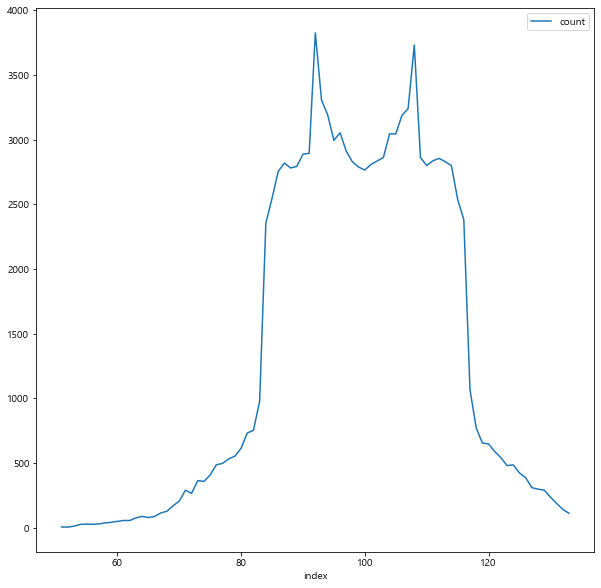

In [498]:
df_plot.plot()

In [499]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [500]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [501]:
df_test2.round(0).value_counts()

108.0    3666
92.0     3578
93.0     3396
107.0    3368
94.0     3239
105.0    3101
109.0    3087
104.0    3079
91.0     3041
106.0    3007
95.0     2989
97.0     2969
96.0     2949
90.0     2929
110.0    2884
112.0    2875
102.0    2867
111.0    2854
89.0     2848
87.0     2848
113.0    2845
101.0    2839
99.0     2824
98.0     2795
86.0     2781
103.0    2755
88.0     2748
100.0    2665
114.0    2611
115.0    2538
85.0     2533
116.0    2277
84.0     2167
117.0    1116
83.0     1097
118.0     762
82.0      739
81.0      707
119.0     684
120.0     658
80.0      640
121.0     583
78.0      550
122.0     537
79.0      514
76.0      506
123.0     495
124.0     495
77.0      476
125.0     401
126.0     380
75.0      377
74.0      373
73.0      360
127.0     319
128.0     294
72.0      282
129.0     277
71.0      273
130.0     236
70.0      216
131.0     176
69.0      171
132.0     141
133.0     131
68.0      125
67.0      107
66.0       91
63.0       91
65.0       79
64.0       76
62.0  

In [502]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [503]:
df_plot2.columns = ['count']

In [504]:
df_plot2.reset_index(inplace=True)

In [505]:
df_plot2

,0,count
0,108.0,3666
1,92.0,3578
2,93.0,3396
3,107.0,3368
4,94.0,3239
5,105.0,3101
6,109.0,3087
7,104.0,3079
8,91.0,3041
9,106.0,3007


In [506]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [507]:
df_plot2.set_index(0, inplace=True)

In [508]:
df_plot2

,count
0,
51.0,5
52.0,6
53.0,9
54.0,32
55.0,20
56.0,27
57.0,29
58.0,39
59.0,31


<AxesSubplot:xlabel='0'>

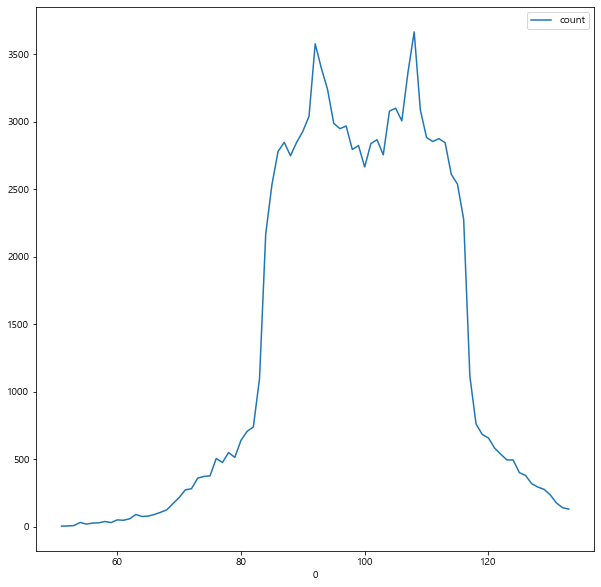

In [509]:
df_plot2.plot()

# 시각화

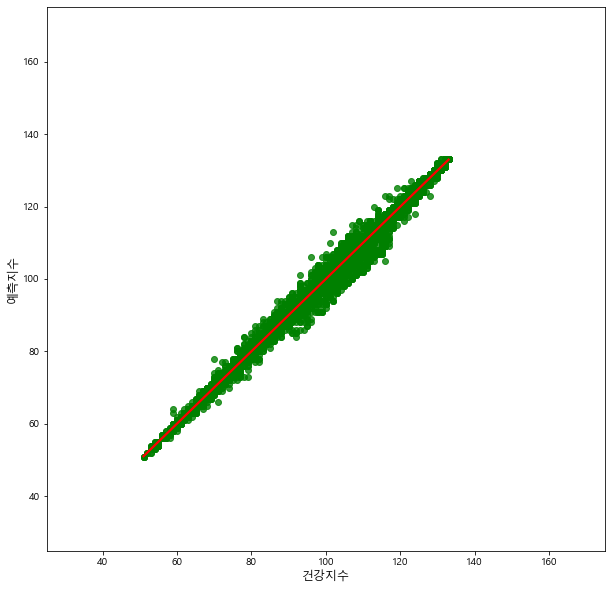

In [510]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [511]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
0,2022,48,1140655,2,34,105.0,200.00,5.34,9.26,23.28,100.00,9.67,44.32,72.0
1,2021,53,2632765,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0
2,2023,53,2632764,2,28,96.0,81.64,5.34,8.12,82.40,100.00,100.00,94.13,97.0
3,2024,53,2658222,2,29,101.0,76.00,5.40,8.25,38.50,74.41,111.53,74.81,87.0
4,2020,54,497669,2,30,83.0,68.00,4.80,7.95,104.98,163.09,149.22,139.10,120.0


In [512]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364686 entries, 0 to 364685
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               364686 non-null  int64  
 1   UID                364686 non-null  int64  
 2   CU_REC_ID          364686 non-null  int64  
 3   SEX                364686 non-null  int64  
 4   검진당시나이             364686 non-null  int64  
 5   공복시혈당(FBS)         364686 non-null  float64
 6   중성지방(TG)           364686 non-null  float64
 7   당화혈색소 (HbA1c)      364686 non-null  float64
 8   TyG                364686 non-null  float64
 9   공복시혈당(FBS)_kde     364686 non-null  float64
 10  당화혈색소 (HbA1c)_kde  364686 non-null  float64
 11  TyG_kde            364686 non-null  float64
 12  kde_mean           364686 non-null  float64
 13  target             364686 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 39.0 MB


In [513]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target
78764,2021,196909,2495703,2,28,85.0,70.0,5.2,8.00,117.17,100.10,145.97,121.08,111.0
78765,2022,196909,2495702,2,29,79.0,53.0,5.2,7.65,59.32,100.00,114.92,91.41,96.0
78766,2023,196909,2495700,2,30,87.0,76.0,5.6,8.10,142.93,42.14,143.77,109.61,105.0
78767,2024,196909,2495697,2,31,92.0,49.0,5.3,7.72,134.20,101.00,128.40,121.20,111.0


In [514]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [515]:
len(df_pred2)

364686

In [516]:
df_pred2.reset_index(drop=True, inplace=True)

In [517]:
X_test2

,검진당시나이,공복시혈당(FBS),당화혈색소 (HbA1c),TyG
38744,34,99.0,5.34,8.81
299005,43,102.0,5.40,8.84
29123,35,81.0,5.34,8.08
263917,26,102.0,5.34,8.12
296528,47,91.0,5.34,8.08
...,...,...,...,...
88196,41,88.0,4.50,8.12
172279,31,91.0,4.70,8.14
276069,40,90.0,4.60,9.32
98767,47,94.0,5.50,8.73


In [518]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG', '공복시혈당(FBS)_kde', '당화혈색소 (HbA1c)_kde',
       'TyG_kde', 'kde_mean', 'target'],
      dtype='object')

In [519]:
df_pred2[train_columns]

,검진당시나이,공복시혈당(FBS),당화혈색소 (HbA1c),TyG
0,34,105.0,5.34,9.26
1,26,86.0,5.30,7.90
2,28,96.0,5.34,8.12
3,29,101.0,5.40,8.25
4,30,83.0,4.80,7.95
...,...,...,...,...
364681,60,95.0,5.34,8.27
364682,62,105.0,5.34,8.12
364683,56,89.0,5.40,8.40
364684,30,85.0,5.34,8.12


In [520]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [521]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [522]:
pred_data2

array([ 71.50551, 112.99279,  97.65184, ..., 117.21261, 105.12839,
       101.48899], dtype=float32)

In [523]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [524]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [525]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수
0,2022,48,1140655,2,34,105.0,200.00,5.34,9.26,23.28,100.00,9.67,44.32,72.0,71.505508
1,2021,53,2632765,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0,112.992790
2,2023,53,2632764,2,28,96.0,81.64,5.34,8.12,82.40,100.00,100.00,94.13,97.0,97.651840
3,2024,53,2658222,2,29,101.0,76.00,5.40,8.25,38.50,74.41,111.53,74.81,87.0,87.376953
4,2020,54,497669,2,30,83.0,68.00,4.80,7.95,104.98,163.09,149.22,139.10,120.0,119.586845
5,2022,54,1319859,2,32,85.0,50.00,5.40,7.66,126.83,83.18,98.73,102.91,101.0,101.283958
6,2023,54,2039511,2,33,87.0,72.00,5.10,8.05,138.35,114.01,149.57,133.98,117.0,117.054092
7,2024,54,2750990,2,34,85.0,110.00,5.00,8.45,123.00,145.77,81.91,116.89,108.0,108.784691
8,2019,56,1605927,2,30,90.0,81.64,5.34,8.12,149.81,100.00,100.00,116.60,108.0,108.852409
9,2020,56,1605928,2,31,93.0,81.64,5.34,8.12,122.01,100.00,100.00,107.34,104.0,104.393723


## 예측지수 성능평가

In [526]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.46175082111177157

# target으로 나이 계산

In [527]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [528]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,105.0,200.00,5.34,9.26,23.28,100.00,9.67,44.32,72.0,71.505508,39.70
1,2021,53,2632765,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0,112.992790,23.40
2,2023,53,2632764,2,28,96.0,81.64,5.34,8.12,82.40,100.00,100.00,94.13,97.0,97.651840,28.47
3,2024,53,2658222,2,29,101.0,76.00,5.40,8.25,38.50,74.41,111.53,74.81,87.0,87.376953,31.52
4,2020,54,497669,2,30,83.0,68.00,4.80,7.95,104.98,163.09,149.22,139.10,120.0,119.586845,26.08
5,2022,54,1319859,2,32,85.0,50.00,5.40,7.66,126.83,83.18,98.73,102.91,101.0,101.283958,31.74
6,2023,54,2039511,2,33,87.0,72.00,5.10,8.05,138.35,114.01,149.57,133.98,117.0,117.054092,29.59
7,2024,54,2750990,2,34,85.0,110.00,5.00,8.45,123.00,145.77,81.91,116.89,108.0,108.784691,32.24
8,2019,56,1605927,2,30,90.0,81.64,5.34,8.12,149.81,100.00,100.00,116.60,108.0,108.852409,28.23
9,2020,56,1605928,2,31,93.0,81.64,5.34,8.12,122.01,100.00,100.00,107.34,104.0,104.393723,30.12


## 예측나이 성능평가

In [529]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.9578746647801122

# 최종 산출

In [530]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,공복시혈당(FBS)_kde,당화혈색소 (HbA1c)_kde,TyG_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,105.0,200.00,5.34,9.26,23.28,100.00,9.67,44.32,72.0,71.505508,39.70
1,2021,53,2632765,2,26,86.0,63.00,5.30,7.90,135.00,93.24,150.00,126.08,113.0,112.992790,23.40
2,2023,53,2632764,2,28,96.0,81.64,5.34,8.12,82.40,100.00,100.00,94.13,97.0,97.651840,28.47
3,2024,53,2658222,2,29,101.0,76.00,5.40,8.25,38.50,74.41,111.53,74.81,87.0,87.376953,31.52
4,2020,54,497669,2,30,83.0,68.00,4.80,7.95,104.98,163.09,149.22,139.10,120.0,119.586845,26.08


# DataMart csv

In [531]:
df_copy = df.copy()

In [532]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
0,2010,7282,2520,1,42,83.0,98.0,NaN
1,2010,7490,3638,1,39,125.0,103.0,NaN
2,2010,7915,3997,1,36,104.0,547.0,NaN
3,2010,8056,4745,1,42,89.0,378.0,NaN
4,2010,8457,3929,1,38,121.0,154.0,NaN


In [533]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   공복시혈당(FBS)     1199640 non-null  float64
 6   중성지방(TG)       1147041 non-null  float64
 7   당화혈색소 (HbA1c)  758186 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [534]:
minimums

[68.5, -52.0, 4.45]

In [535]:
maximums

[120.5, 268.0, 6.45]

In [536]:
train_columns

['검진당시나이', '공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [537]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [538]:
target_cols_temp

['공복시혈당(FBS)', '중성지방(TG)', '당화혈색소 (HbA1c)']

In [539]:
for idx, col in enumerate(target_cols_temp):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [540]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [541]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)
10,2010,15894,2533,2,29,81.0,55.0,NaN
22,2010,42223,1364,2,24,83.0,55.0,NaN
37,2011,364096,6645,2,32,91.0,53.0,NaN
45,2010,120518,3595,2,30,86.0,100.0,NaN
63,2011,698706,6600,2,36,88.0,112.0,NaN


## 스크리닝

In [542]:
screening = 50

In [543]:
scr_col = '공복시혈당(FBS)'

In [544]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [545]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [546]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [547]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c)


In [548]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [549]:
len(df_woman_csv)

448440

# 변수 생성

In [550]:
df_woman_csv['TyG'] = np.log((df_woman_csv['공복시혈당(FBS)'] * df_woman_csv['중성지방(TG)']) / 2)

In [551]:
df_woman_csv['TyG'] = df_woman_csv['TyG'].round(2)

In [552]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG'],
      dtype='object')

## 검진 항목 all 결측치 지우기

In [553]:
target_cols

['공복시혈당(FBS)', '당화혈색소 (HbA1c)', 'TyG']

In [554]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [555]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [556]:
len(df_woman_csv)

445788

## fillna

In [557]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG', '공복시혈당(FBS)_kde', '당화혈색소 (HbA1c)_kde',
       'TyG_kde', 'kde_mean', 'target'],
      dtype='object')

In [558]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '공복시혈당(FBS)', '중성지방(TG)',
       '당화혈색소 (HbA1c)', 'TyG'],
      dtype='object')

In [559]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 모델 예측

In [560]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [561]:
pred_data2 = pred_data2.round(0)

In [562]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [563]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수
0,2010,15894,2533,2,29,81.0,55.0,5.34,7.71,100.0
1,2010,42223,1364,2,24,83.0,55.0,5.34,7.73,109.0
2,2011,364096,6645,2,32,91.0,53.0,5.34,7.79,113.0
3,2010,120518,3595,2,30,86.0,100.0,5.34,8.37,105.0
4,2011,698706,6600,2,36,88.0,112.0,5.34,8.50,105.0


### 성능 평가

In [564]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [565]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [566]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [567]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.0779608244277545


In [568]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9065550223483609

In [569]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
0,2010,15894,2533,2,29,81.0,55.0,5.34,7.71,100.0,29.0
1,2010,42223,1364,2,24,83.0,55.0,5.34,7.73,109.0,22.2
2,2011,364096,6645,2,32,91.0,53.0,5.34,7.79,113.0,29.4
3,2010,120518,3595,2,30,86.0,100.0,5.34,8.37,105.0,29.0
4,2011,698706,6600,2,36,88.0,112.0,5.34,8.50,105.0,35.0


In [570]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445788 entries, 0 to 445787
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           445788 non-null  int64  
 1   UID            445788 non-null  int64  
 2   CU_REC_ID      445788 non-null  int64  
 3   SEX            445788 non-null  int64  
 4   검진당시나이         445788 non-null  int64  
 5   공복시혈당(FBS)     445788 non-null  float64
 6   중성지방(TG)       445788 non-null  float64
 7   당화혈색소 (HbA1c)  445788 non-null  float64
 8   TyG            445788 non-null  float64
 9   예측지수           445788 non-null  float32
 10  예측나이           445788 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 35.7 MB


# 최종 UID별 확인

In [571]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
126262,2021,261581,806568,2,50,93.0,72.0,5.5,8.12,110.0,48.0
126271,2021,261581,2243879,2,50,93.0,72.0,5.5,8.12,110.0,48.0
126272,2021,261581,2418909,2,50,93.0,72.0,5.5,8.12,110.0,48.0
126273,2021,261581,2418910,2,50,93.0,72.0,5.5,8.12,110.0,48.0
191306,2022,261581,751339,2,51,99.0,172.0,5.4,9.05,92.0,52.6
191309,2022,261581,2243878,2,51,99.0,172.0,5.4,9.05,92.0,52.6
286179,2023,261581,1519764,2,52,98.0,128.0,5.2,8.74,110.0,50.0
286180,2023,261581,2243877,2,52,98.0,128.0,5.2,8.74,110.0,50.0
411051,2024,261581,2418911,2,53,91.0,116.0,5.5,8.57,113.0,50.4


In [572]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
66736,2022,477944,956268,2,31,83.0,130.0,5.4,8.59,92.0,32.6
224194,2022,477944,2212776,2,31,83.0,130.0,5.4,8.59,92.0,32.6
332266,2023,477944,1454346,2,32,87.0,109.0,5.2,8.46,102.0,31.6
332267,2023,477944,2212775,2,32,87.0,109.0,5.2,8.46,102.0,31.6
423468,2024,477944,2362855,2,33,86.0,93.0,5.2,8.29,109.0,31.2


In [573]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
358279,2023,896916,1459636,2,28,80.0,71.0,5.4,7.95,100.0,28.0
358268,2023,896916,1842092,2,28,80.0,71.0,5.4,7.95,100.0,28.0
358280,2023,896916,2031853,2,28,80.0,71.0,5.4,7.95,100.0,28.0
358281,2023,896916,2253054,2,28,80.0,71.0,5.4,7.95,100.0,28.0
352250,2023,896916,2257188,2,28,80.0,71.0,5.4,7.95,100.0,28.0
434409,2024,896916,2253058,2,29,81.0,42.0,5.4,7.44,87.0,31.6


# 최종 CSV 병합 Extract

In [574]:
len(df_man_csv)

760385

In [575]:
len(df_woman_csv)

445788

In [576]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [577]:
df_csv.to_csv(csv_path)